Companies worldwide report their greenhouse gas emissions by dividing them between direct emissions (Scope 1) and indirect emissions (Scope 2). Multiplying the absolute emissions by the CO2 Damage Cost – the dollar cost for each ton of CO2-equivalent emitted – one obtains the Scope 1 and Scope 2 Damage Costs for all companies, as provided in the Excel file.

Given the difference in size of companies, it’s crucial to normalize the damage costs to be able to perform meaningful analysis on them. For this purpose, we propose to calculate the Impact Ratio, as the Damage Cost divided by the total revenues of each company. 
It’s expected that companies will have a higher or lower impact ratio depending on their business and the current case study aims to assess if this expectation meets reality.

**Data inputs:**

The attached Impact_Ratio_Assignment.xlsx contains data tables that may assist you in answering the queries below. You’re free to use other outside information to supplement the analysis, but you’re expected to use the data provided. The attached Excel contain the following sheets: 
1.	Table 1: The company’s Scope 1 and Scope 2 Damage Costs 
2.	Table 2: The company’s GICS industry allocation 

Scope 1 emissions are direct emissions from sources owned or controlled by an organization, while Scope 2 emissions are indirect emissions from purchased electricity, steam, heating, or cooling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

Load data

In [3]:
# Load data
data_path = "Copy of Case Study_Data Scientist_S1_Impact_Ratio_Assignment (004).xlsx"
sheets = pd.read_excel(data_path, sheet_name=None, index_col=0)

damage_df = sheets["Table 1"]
industry_df = sheets["Table 2"]

# Join on CompanyID
df = industry_df.join(damage_df).sort_values("CompanyID")
assert len(df) == len(damage_df)  # Assert no company is left behind

# Rename columns
df.columns = ["IndustryGroup", "TotalRevenue", "DamageCost_Scope1", "DamageCost_Scope2"]

df.head(5)

IndustryGroup  TotalRevenue  DamageCost_Scope1  \
CompanyID                                                        
COM0001    Financial Services     16338.000           0.338315   
COM0002                 Banks       541.302           0.022633   
COM0003                 Banks      6943.000           0.240284   
COM0004                 Banks      7661.559           0.928260   
COM0005                 Banks      7823.000           0.523893   

           DamageCost_Scope2  
CompanyID                     
COM0001             4.247979  
COM0002             0.134260  
COM0003             2.613041  
COM0004             1.819234  
COM0005             2.927635

In [4]:
df.describe()

TotalRevenue  DamageCost_Scope1  DamageCost_Scope2
count    2897.000000       2.897000e+03        2897.000000
mean     8913.320889       4.349717e+04          15.767660
std     23854.406534       2.335915e+06          69.893906
min         0.121100       0.000000e+00           0.000000
25%       912.898386       1.801503e-01           0.381507
50%      2612.386613       1.390032e+00           1.823798
75%      7626.000000       1.152834e+01           8.721362
max    493700.155599       1.257279e+08        2179.249475

## Exercise 1:

> As Data Scientist you’re tasked to analyze environmental data coming from an internal database, covering Scope 1 and Scope 2 Damage Costs and Revenues (please note not all companies have data available). 
The target of this first exercise is to calculate the Impact Ratios of companies and to create a narrative around industries with higher and lower Impact Ratios. The Impact Ratio of a company is defined as the Damage Cost divided by the Total Revenues. These values are provided in the Table 1 of the Excel provided, for Scope 1 and Scope 2. Industries are separately provided in Table 2. 

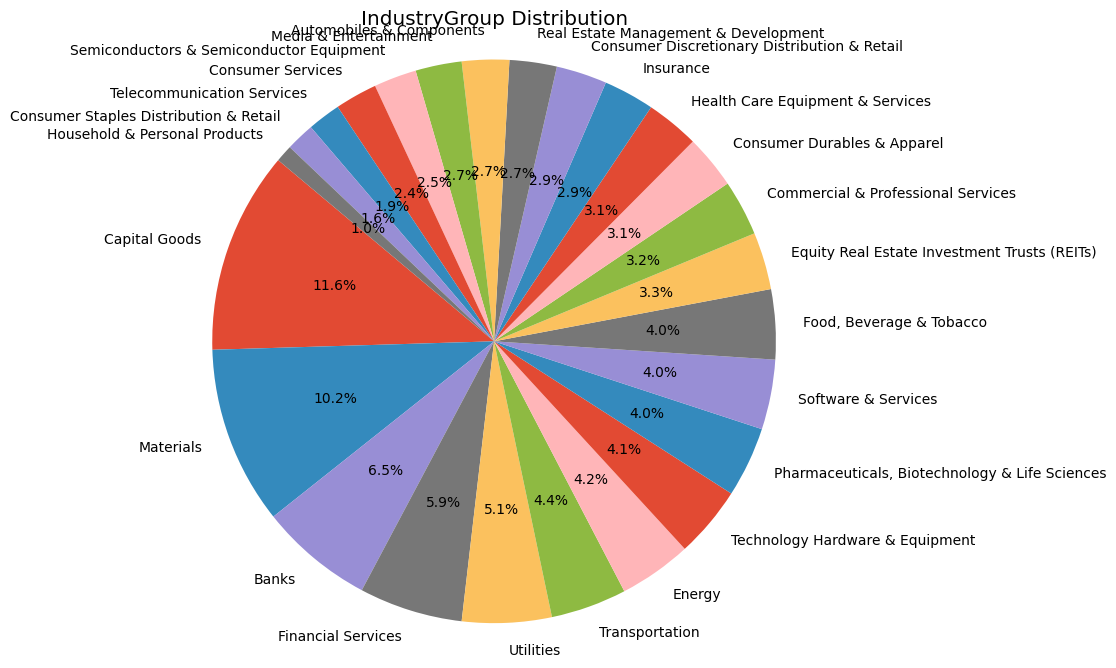

IndustryGroup
Capital Goods                                     402
Materials                                         354
Banks                                             227
Financial Services                                206
Utilities                                         178
Transportation                                    151
Energy                                            145
Technology Hardware & Equipment                   142
Pharmaceuticals, Biotechnology & Life Sciences    140
Software & Services                               139
Food, Beverage & Tobacco                          139
Equity Real Estate Investment Trusts (REITs)      114
Commercial & Professional Services                111
Consumer Durables & Apparel                       107
Health Care Equipment & Services                  106
Insurance                                         101
Consumer Discretionary Distribution & Retail      101
Real Estate Management & Development               94
Automobiles & 

In [5]:
# Pie chart of value counts for IndustryGroup
industry_counts = df.value_counts("IndustryGroup")
plt.figure(figsize=(8, 8))
plt.pie(
    industry_counts, labels=industry_counts.index, autopct="%1.1f%%", startangle=140
)
plt.title("IndustryGroup Distribution")
plt.axis("equal")
plt.show()

industry_counts

**Analyzing missing values**

In [6]:
df.isnull().sum()

IndustryGroup          0
TotalRevenue         572
DamageCost_Scope1    572
DamageCost_Scope2    572
dtype: int64

In [7]:
nan_companies = df.isna().any(axis=1)
df[nan_companies].head()

IndustryGroup  TotalRevenue  DamageCost_Scope1  DamageCost_Scope2
CompanyID                                                                  
COM0011           Banks           NaN                NaN                NaN
COM0016           Banks           NaN                NaN                NaN
COM0017           Banks           NaN                NaN                NaN
COM0018           Banks           NaN                NaN                NaN
COM0020           Banks           NaN                NaN                NaN

In [8]:
# Are the missing values related? If no direct also no indirect and revenue?
df[nan_companies].describe()

# All data missing, not just one column

TotalRevenue  DamageCost_Scope1  DamageCost_Scope2
count           0.0                0.0                0.0
mean            NaN                NaN                NaN
std             NaN                NaN                NaN
min             NaN                NaN                NaN
25%             NaN                NaN                NaN
50%             NaN                NaN                NaN
75%             NaN                NaN                NaN
max             NaN                NaN                NaN

In [9]:
df[nan_companies].fillna(1).groupby("IndustryGroup").count()

# Across all industries

TotalRevenue  \
IndustryGroup                                                  
Automobiles & Components                                  14   
Banks                                                     41   
Capital Goods                                             64   
Commercial & Professional Services                        18   
Consumer Discretionary Distribution & Retail              20   
Consumer Durables & Apparel                               20   
Consumer Services                                         23   
Consumer Staples Distribution & Retail                    13   
Energy                                                    18   
Equity Real Estate Investment Trusts (REITs)              16   
Financial Services                                        52   
Food, Beverage & Tobacco                                  16   
Health Care Equipment & Services                          22   
Household & Personal Products                              9   
Insurance                                                 26   
Materials                                                 40   
Media & Entertainment                                     25   
Pharmaceuticals, Biotechnology & Life Sciences            23   
Real Estate Management & Development                      14   
Semiconductors & Semiconductor Equipment                   8   
Software & Services                                       34   
Technology Hardware & Equipment                           13   
Telecommunication Services                                13   
Transportation                                            19   
Utilities                                                 11   

                                                DamageCost_Scope1  \
IndustryGroup                                                       
Automobiles & Components                                       14   
Banks                                                          41   
Capital Goods                                                  64   
Commercial & Professional Services                             18   
Consumer Discretionary Distribution & Retail                   20   
Consumer Durables & Apparel                                    20   
Consumer Services                                              23   
Consumer Staples Distribution & Retail                         13   
Energy                                                         18   
Equity Real Estate Investment Trusts (REITs)                   16   
Financial Services                                             52   
Food, Beverage & Tobacco                                       16   
Health Care Equipment & Services                               22   
Household & Personal Products                                   9   
Insurance                                                      26   
Materials                                                      40   
Media & Entertainment                                          25   
Pharmaceuticals, Biotechnology & Life Sciences                 23   
Real Estate Management & Development                           14   
Semiconductors & Semiconductor Equipment                        8   
Software & Services                                            34   
Technology Hardware & Equipment                                13   
Telecommunication Services                                     13   
Transportation                                                 19   
Utilities                                                      11   

                                                DamageCost_Scope2  
IndustryGroup                                                      
Automobiles & Components                                       14  
Banks                                                          41  
Capital Goods                                                  64  
Commercial & Professional Services                             18  
Consumer Discretionary Distribution & Retail   

In [10]:
# Remove them, imputation?
# Put zero, estimate?
# Based on Industry? Based on direct?

In [11]:
# Dropping for now
df = df[np.logical_not(nan_companies)]
df.value_counts("IndustryGroup")

IndustryGroup
Capital Goods                                     338
Materials                                         314
Banks                                             186
Utilities                                         167
Financial Services                                154
Transportation                                    132
Technology Hardware & Equipment                   129
Energy                                            127
Food, Beverage & Tobacco                          123
Pharmaceuticals, Biotechnology & Life Sciences    117
Software & Services                               105
Equity Real Estate Investment Trusts (REITs)       98
Commercial & Professional Services                 93
Consumer Durables & Apparel                        87
Health Care Equipment & Services                   84
Consumer Discretionary Distribution & Retail       81
Real Estate Management & Development               80
Automobiles & Components                           80
Semiconductors

**Visualizing**

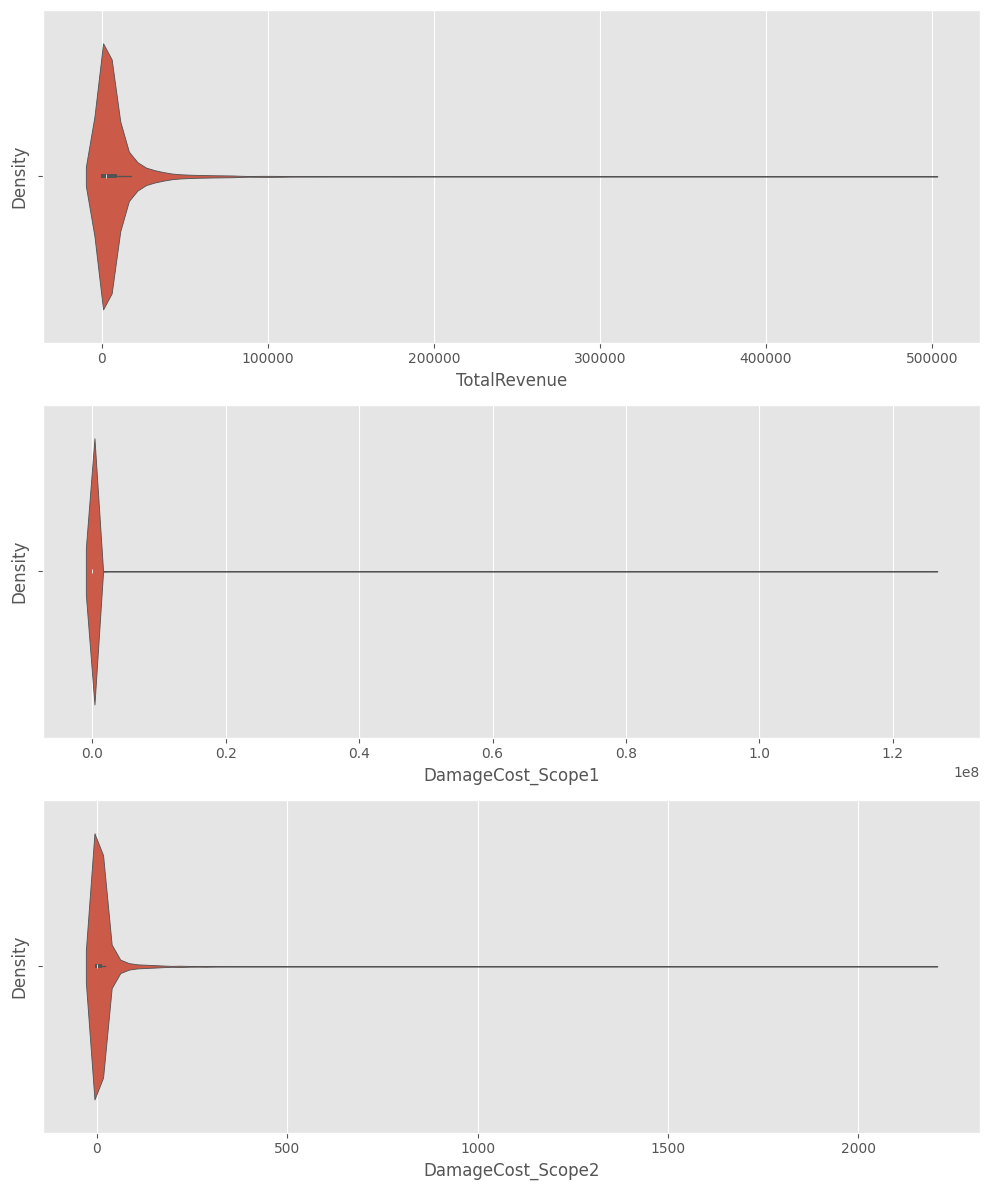

In [12]:
features = ["TotalRevenue", "DamageCost_Scope1", "DamageCost_Scope2"]

fig, axes = plt.subplots(len(features), 1, figsize=(10, 12))
for i, feature in enumerate(features):
    sns.violinplot(df, x=feature, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    # Optionally, use log scale for highly skewed data
    # axes[i].set_xscale("log")

plt.tight_layout()
plt.show()

**Analyzing outliers**

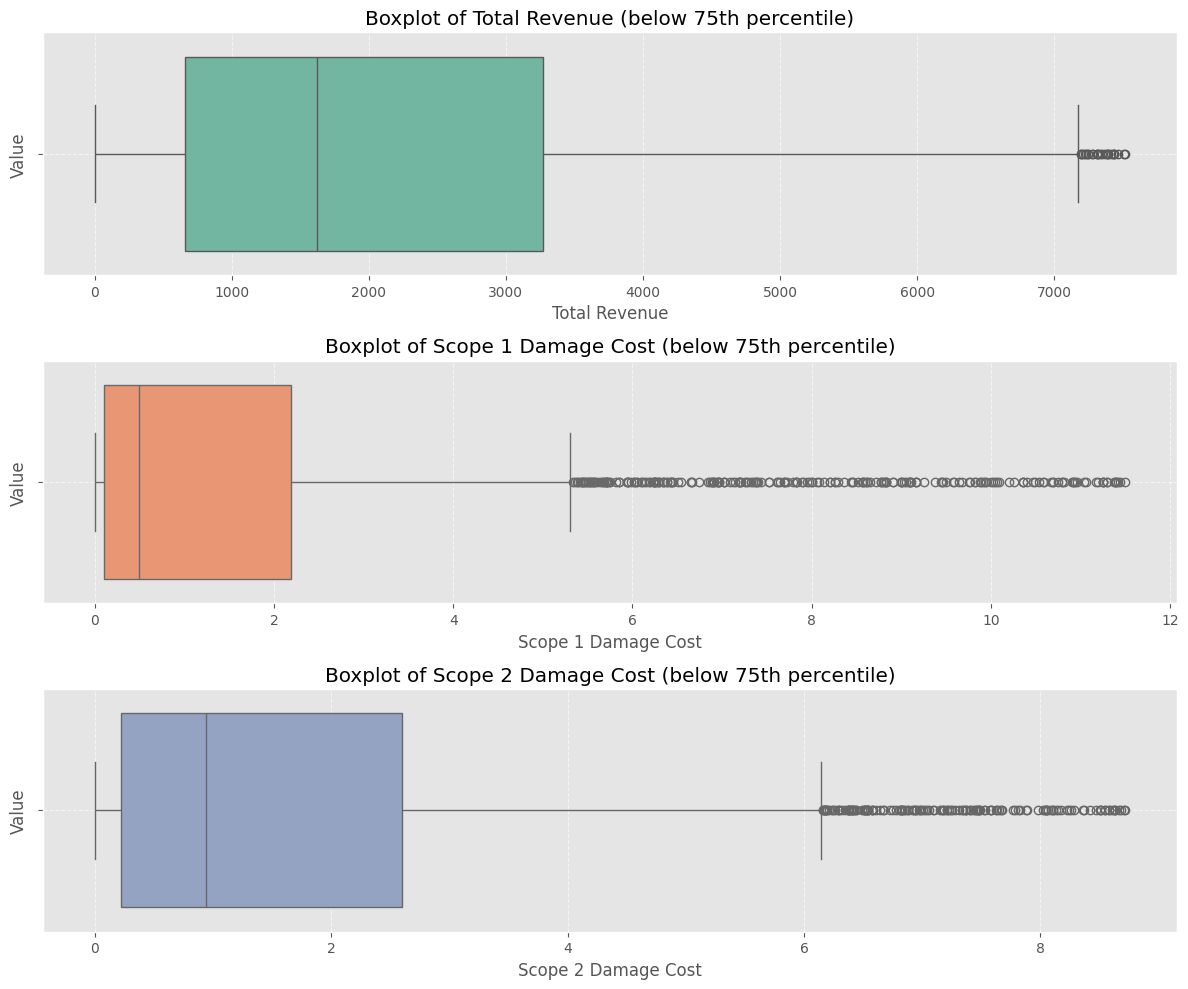

In [13]:
# Those above the q75?
# Why are outliers? Noisy, capped?
# Probably real

q75_revenue = np.quantile(df["TotalRevenue"], q=0.75)
q75_direct = np.quantile(df["DamageCost_Scope1"], q=0.75)
q75_indirect = np.quantile(df["DamageCost_Scope2"], q=0.75)

features = [
    ("TotalRevenue", q75_revenue, "Total Revenue"),
    ("DamageCost_Scope1", q75_direct, "Scope 1 Damage Cost"),
    ("DamageCost_Scope2", q75_indirect, "Scope 2 Damage Cost"),
]
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
palette = sns.color_palette("Set2")
for i, (feature, q75, title) in enumerate(features):
    sns.boxplot(data=df[df[feature] < q75], x=feature, ax=axes[i], color=palette[i])
    axes[i].set_title(f"Boxplot of {title} (below 75th percentile)")
    axes[i].set_xlabel(title)
    axes[i].set_ylabel("Value")
    axes[i].grid(True, linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()

In [14]:
df[
    (df["DamageCost_Scope1"] > q75_direct) | (df["DamageCost_Scope2"] > q75_indirect)
].value_counts("IndustryGroup")

# Makes sense
# I guess insurance and could be related to the companies that works with

IndustryGroup
Materials                                         215
Utilities                                         121
Capital Goods                                      98
Energy                                             95
Transportation                                     72
Food, Beverage & Tobacco                           62
Automobiles & Components                           48
Technology Hardware & Equipment                    44
Semiconductors & Semiconductor Equipment           33
Telecommunication Services                         32
Consumer Staples Distribution & Retail             23
Consumer Services                                  21
Health Care Equipment & Services                   19
Pharmaceuticals, Biotechnology & Life Sciences     18
Real Estate Management & Development               16
Consumer Discretionary Distribution & Retail       15
Banks                                              13
Commercial & Professional Services                 13
Consumer Durab

**Calculating Impact Ratios**

In [15]:
df["ImpactRatio_Scope1"] = df["DamageCost_Scope1"] / df["TotalRevenue"]
df["ImpactRatio_Scope2"] = df["DamageCost_Scope2"] / df["TotalRevenue"]

In [24]:
df.describe()

TotalRevenue  DamageCost_Scope1  DamageCost_Scope2  \
count    2897.000000       2.897000e+03        2897.000000   
mean     8913.320889       4.349717e+04          15.767660   
std     23854.406534       2.335915e+06          69.893906   
min         0.121100       0.000000e+00           0.000000   
25%       912.898386       1.801503e-01           0.381507   
50%      2612.386613       1.390032e+00           1.823798   
75%      7626.000000       1.152834e+01           8.721362   
max    493700.155599       1.257279e+08        2179.249475   

       ImpactRatio_Scope1  ImpactRatio_Scope2  Transformed_ImpactRatio_Scope1  \
count        2.880000e+03        2.889000e+03                     2880.000000   
mean         8.387424e-01        2.428134e-03                       -7.393766   
std          4.432454e+01        1.248723e-02                        2.590378   
min          2.045721e-08        8.675711e-08                      -17.704931   
25%          1.131461e-04        2.480307e-04                       -9.086831   
50%          5.463940e-04        6.880041e-04                       -7.512170   
75%          2.845883e-03        2.131543e-03                       -5.861883   
max          2.378715e+03        6.275696e-01                        7.774316   

       Transformed_ImpactRatio_Scope2  
count                     2889.000000  
mean                        -7.319153  
std                          1.730506  
min                        -16.260153  
25%                         -8.301958  
50%                         -7.281716  
75%                         -6.150909  
max                         -0.465901

In [27]:
# Apply log scale to the axes
df["ImpactRatio_Scope1"] = df["ImpactRatio_Scope1"].replace(0, np.nan)
df["ImpactRatio_Scope2"] = df["ImpactRatio_Scope2"].replace(0, np.nan)

df["Log_ImpactRatio_Scope1"] = np.log10(df["ImpactRatio_Scope1"])
df["Log_ImpactRatio_Scope2"] = np.log10(df["ImpactRatio_Scope2"])

In [54]:
# Sort columns by ratio
df_group_industry = df.groupby(
    "IndustryGroup"
).median()  # Median less sensitive to outliers than mean

order_scope1 = df_group_industry.sort_values(
    "ImpactRatio_Scope1", ascending=False
).index
order_scope2 = df_group_industry.sort_values(
    "ImpactRatio_Scope2", ascending=False
).index

order_colors = sns.color_palette("RdYlGn_r", n_colors=len(order_scope1))

**Visualizing Impact Ratios**

Text(0.5, 1.0, 'Impact Ratios by Scope')

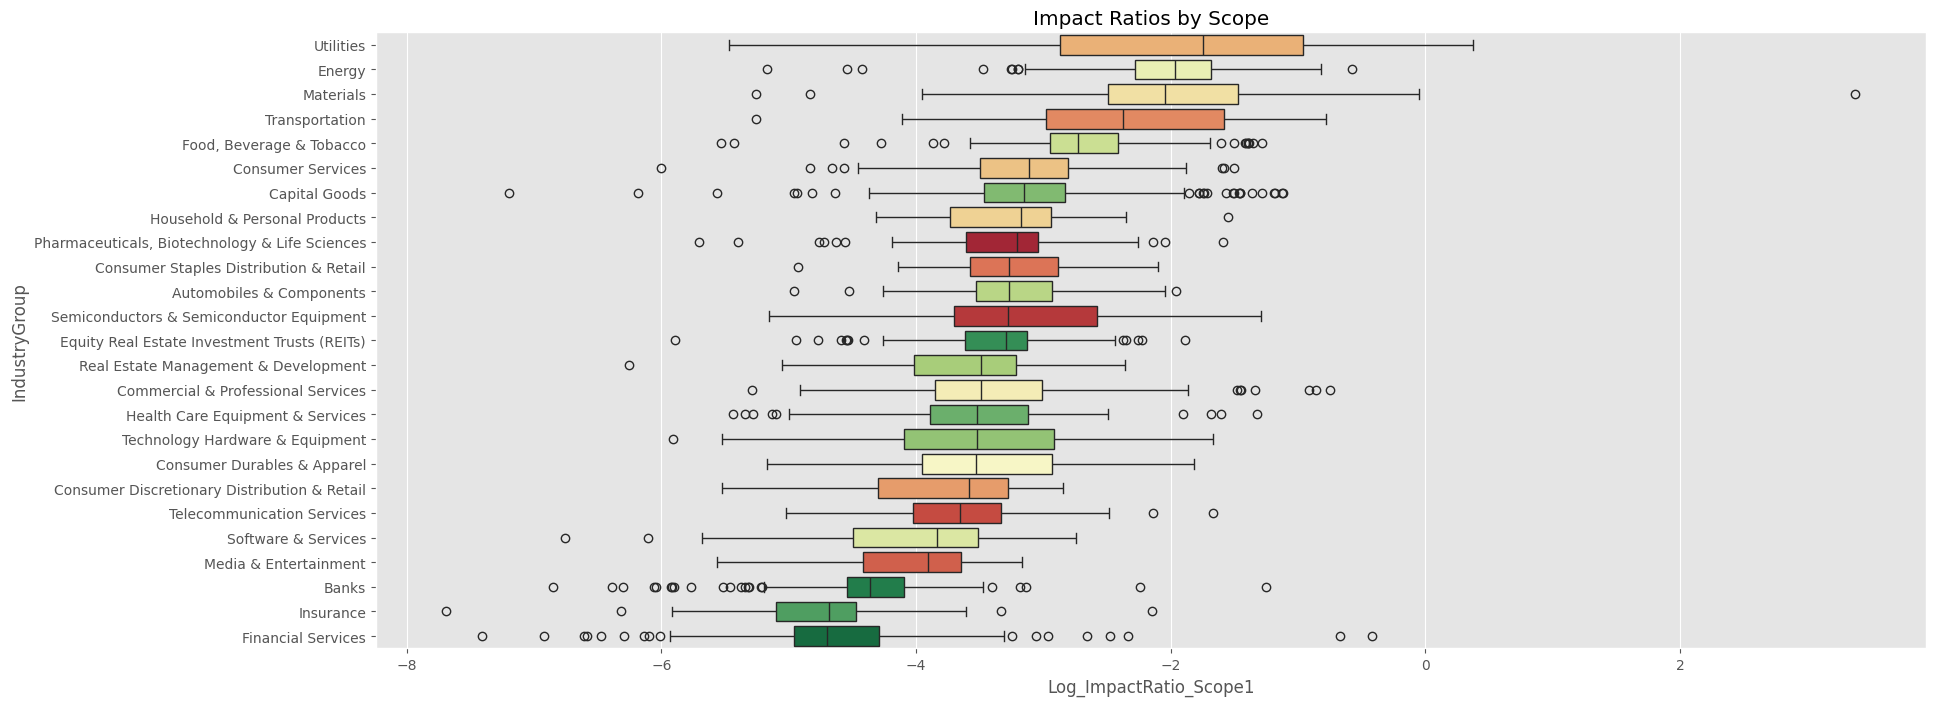

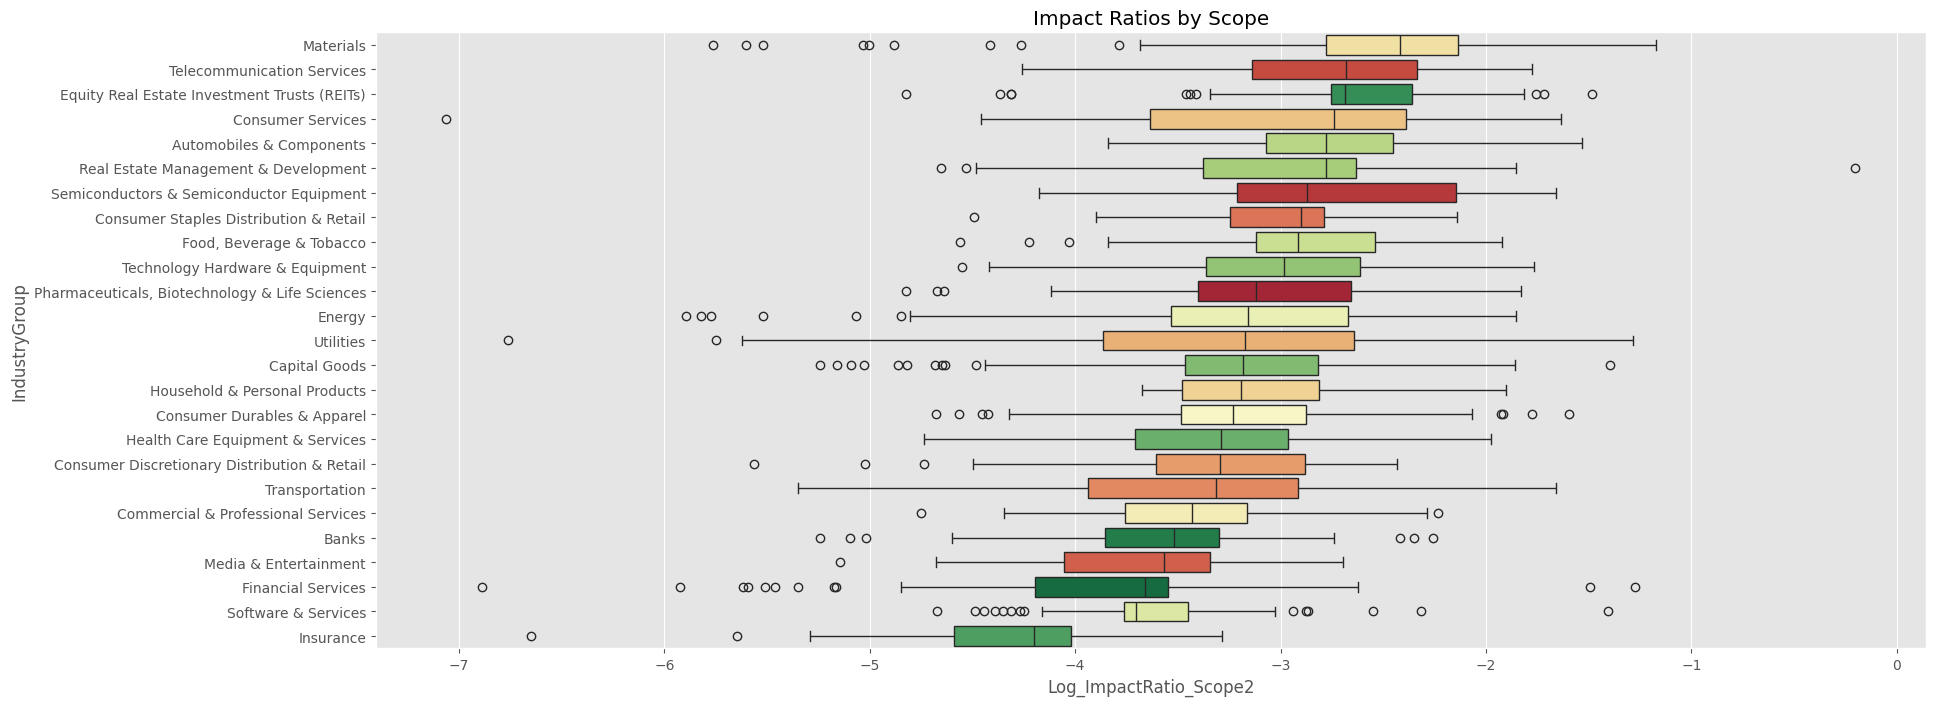

In [55]:
# Boxplot of Impact Ratios
plt.figure(figsize=(20, 8))
sns.boxplot(
    data=df,
    x="Log_ImpactRatio_Scope1",
    y="IndustryGroup",
    order=order_scope1,
    hue="IndustryGroup",
    palette=order_colors,
)
plt.title("Impact Ratios by Scope")

# Boxplot of Impact Ratios
plt.figure(figsize=(20, 8))
sns.boxplot(
    data=df,
    x="Log_ImpactRatio_Scope2",
    y="IndustryGroup",
    order=order_scope2,
    hue="IndustryGroup",
    palette=order_colors,
)
plt.title("Impact Ratios by Scope")

In [17]:
def plot_industrygroup_hist_split(df, order, column, log_scale=True, figsize=(20, 15)):
    """Plot histogram of a column split by half of IndustryGroups in two subplots."""
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
    industry_groups = list(order)
    mid = len(industry_groups) // 2
    groups1 = industry_groups[:mid]
    groups2 = industry_groups[mid:]

    # Determine common x-axis limits for both subplots
    xmin = df[column].min()
    xmax = df[column].max()

    # First half of IndustryGroups
    sns.histplot(
        df[df["IndustryGroup"].isin(groups1)],
        x=column,
        log_scale=log_scale,
        hue="IndustryGroup",
        hue_order=groups1,
        ax=axes[0],
        # multiple="stack",
    )
    axes[0].set_title(f"IndustryGroup (First Half) - {column}")
    axes[0].set_xlim(xmin, xmax)
    axes[0].set_xlabel(column)

    # Second half of IndustryGroups
    sns.histplot(
        df[df["IndustryGroup"].isin(groups2)],
        x=column,
        log_scale=log_scale,
        hue="IndustryGroup",
        hue_order=groups2,
        ax=axes[1],
        # multiple="stack",
    )
    axes[1].set_title(f"IndustryGroup (Second Half) - {column}")
    axes[1].set_xlim(xmin, xmax)
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

C:\Users\n118768\AppData\Local\Temp\ipykernel_5160\720474308.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[0].set_xlim(xmin, xmax)
C:\Users\n118768\AppData\Local\Temp\ipykernel_5160\720474308.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[1].set_xlim(xmin, xmax)
C:\Users\n118768\AppData\Local\Temp\ipykernel_5160\720474308.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[1].set_xlim(xmin, xmax)


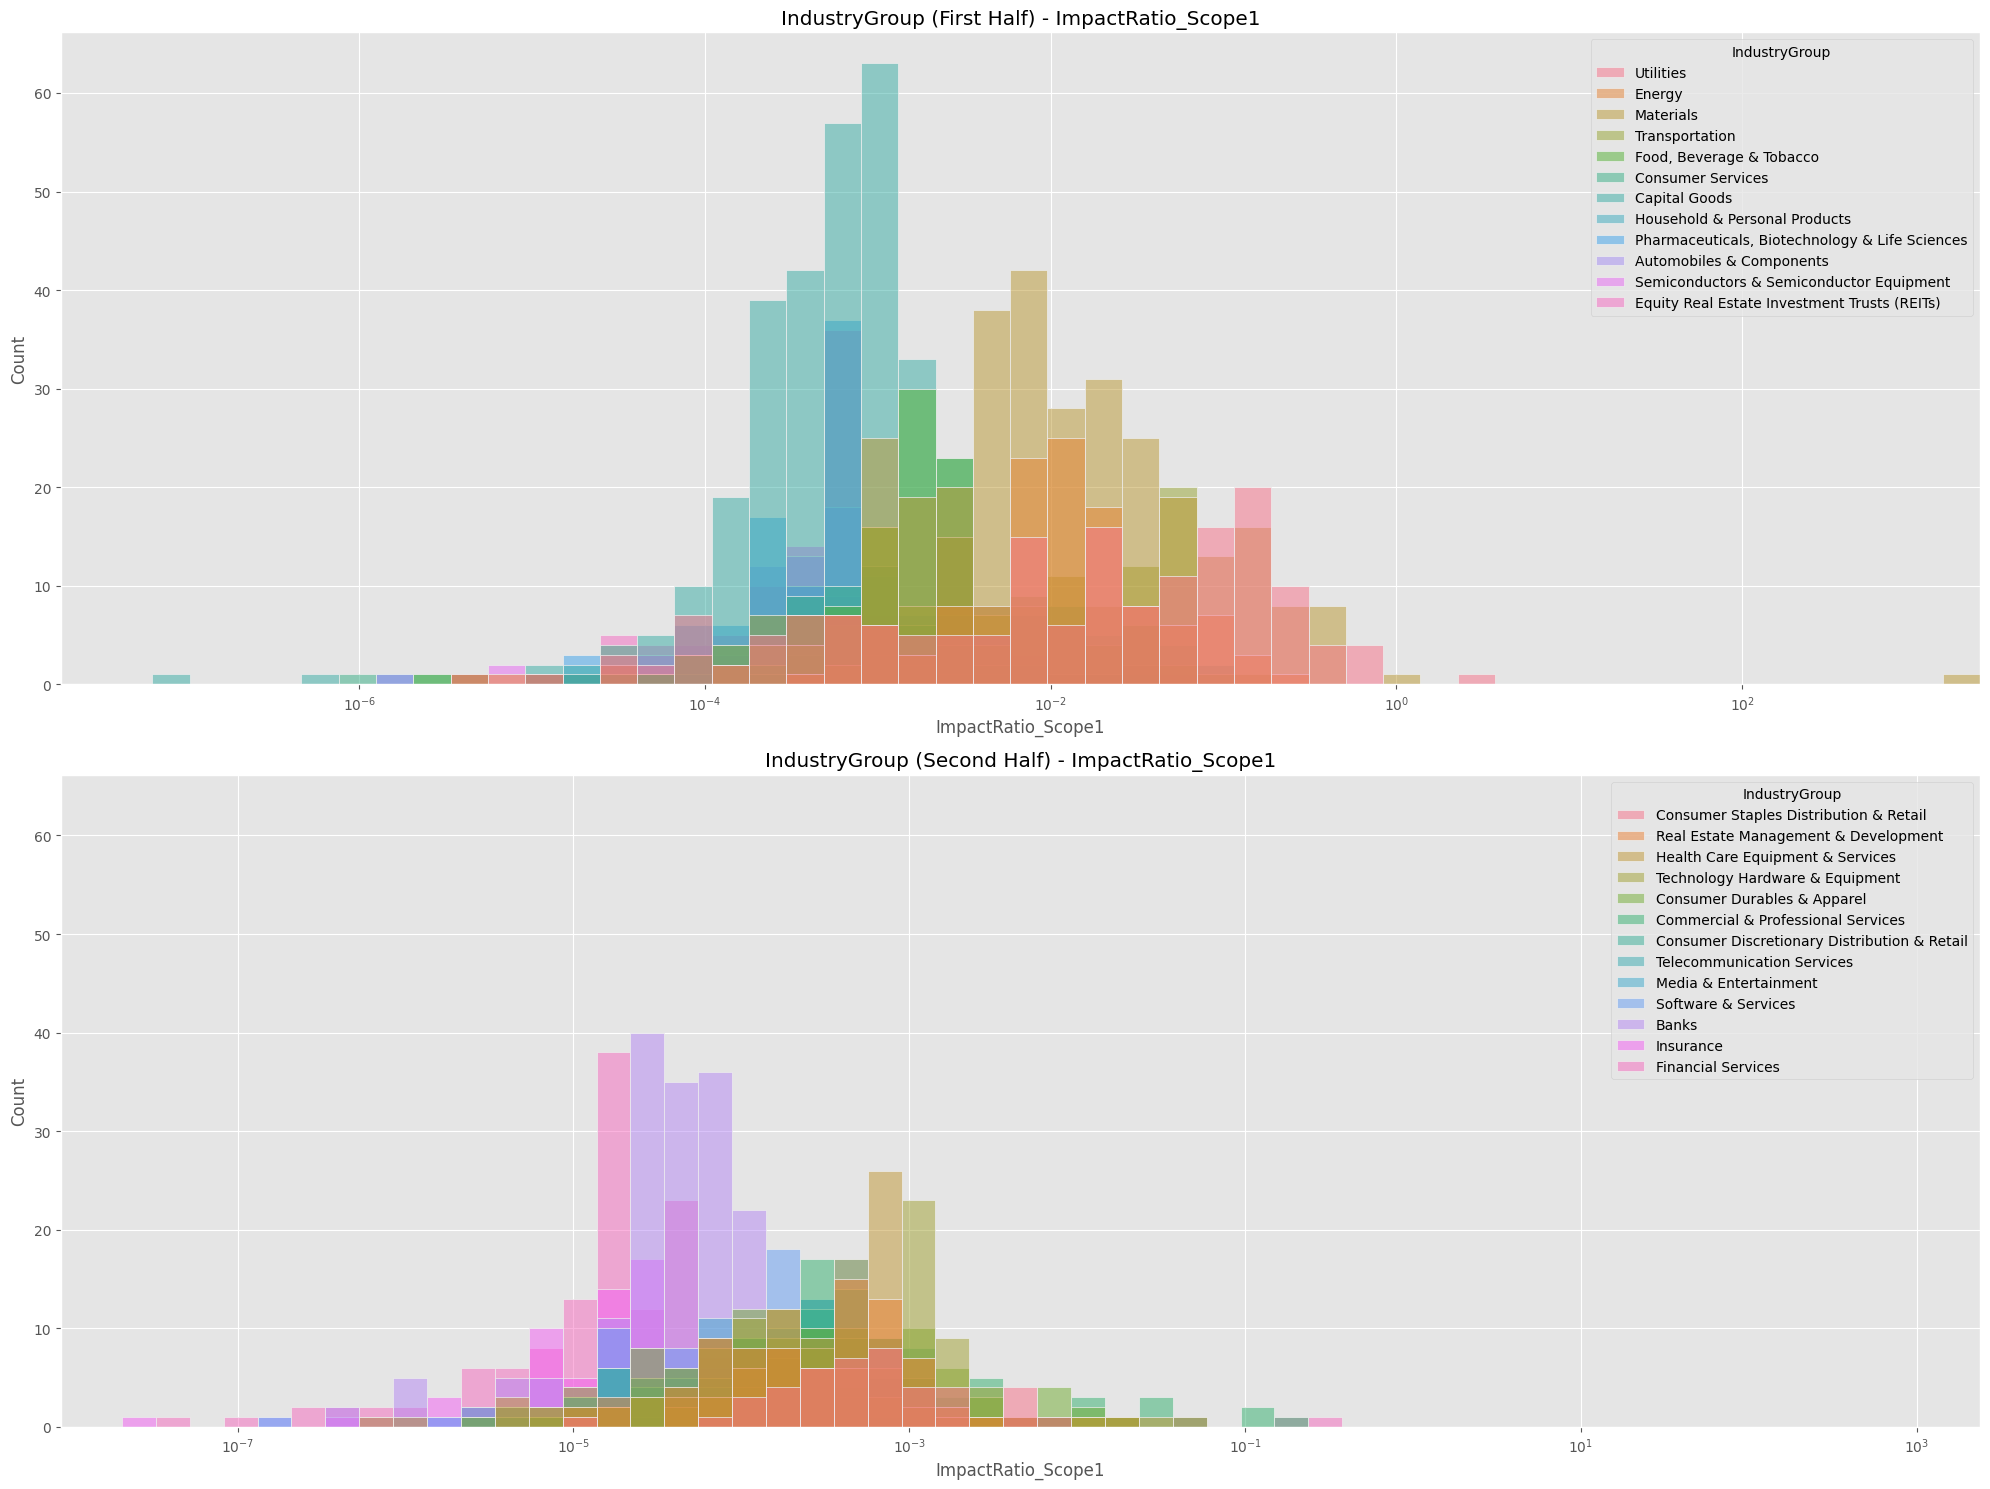

In [18]:
# Careful: In log scale
plot_industrygroup_hist_split(df, order_scope1, "ImpactRatio_Scope1")

C:\Users\n118768\AppData\Local\Temp\ipykernel_5160\720474308.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[0].set_xlim(xmin, xmax)
C:\Users\n118768\AppData\Local\Temp\ipykernel_5160\720474308.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[1].set_xlim(xmin, xmax)
C:\Users\n118768\AppData\Local\Temp\ipykernel_5160\720474308.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[1].set_xlim(xmin, xmax)


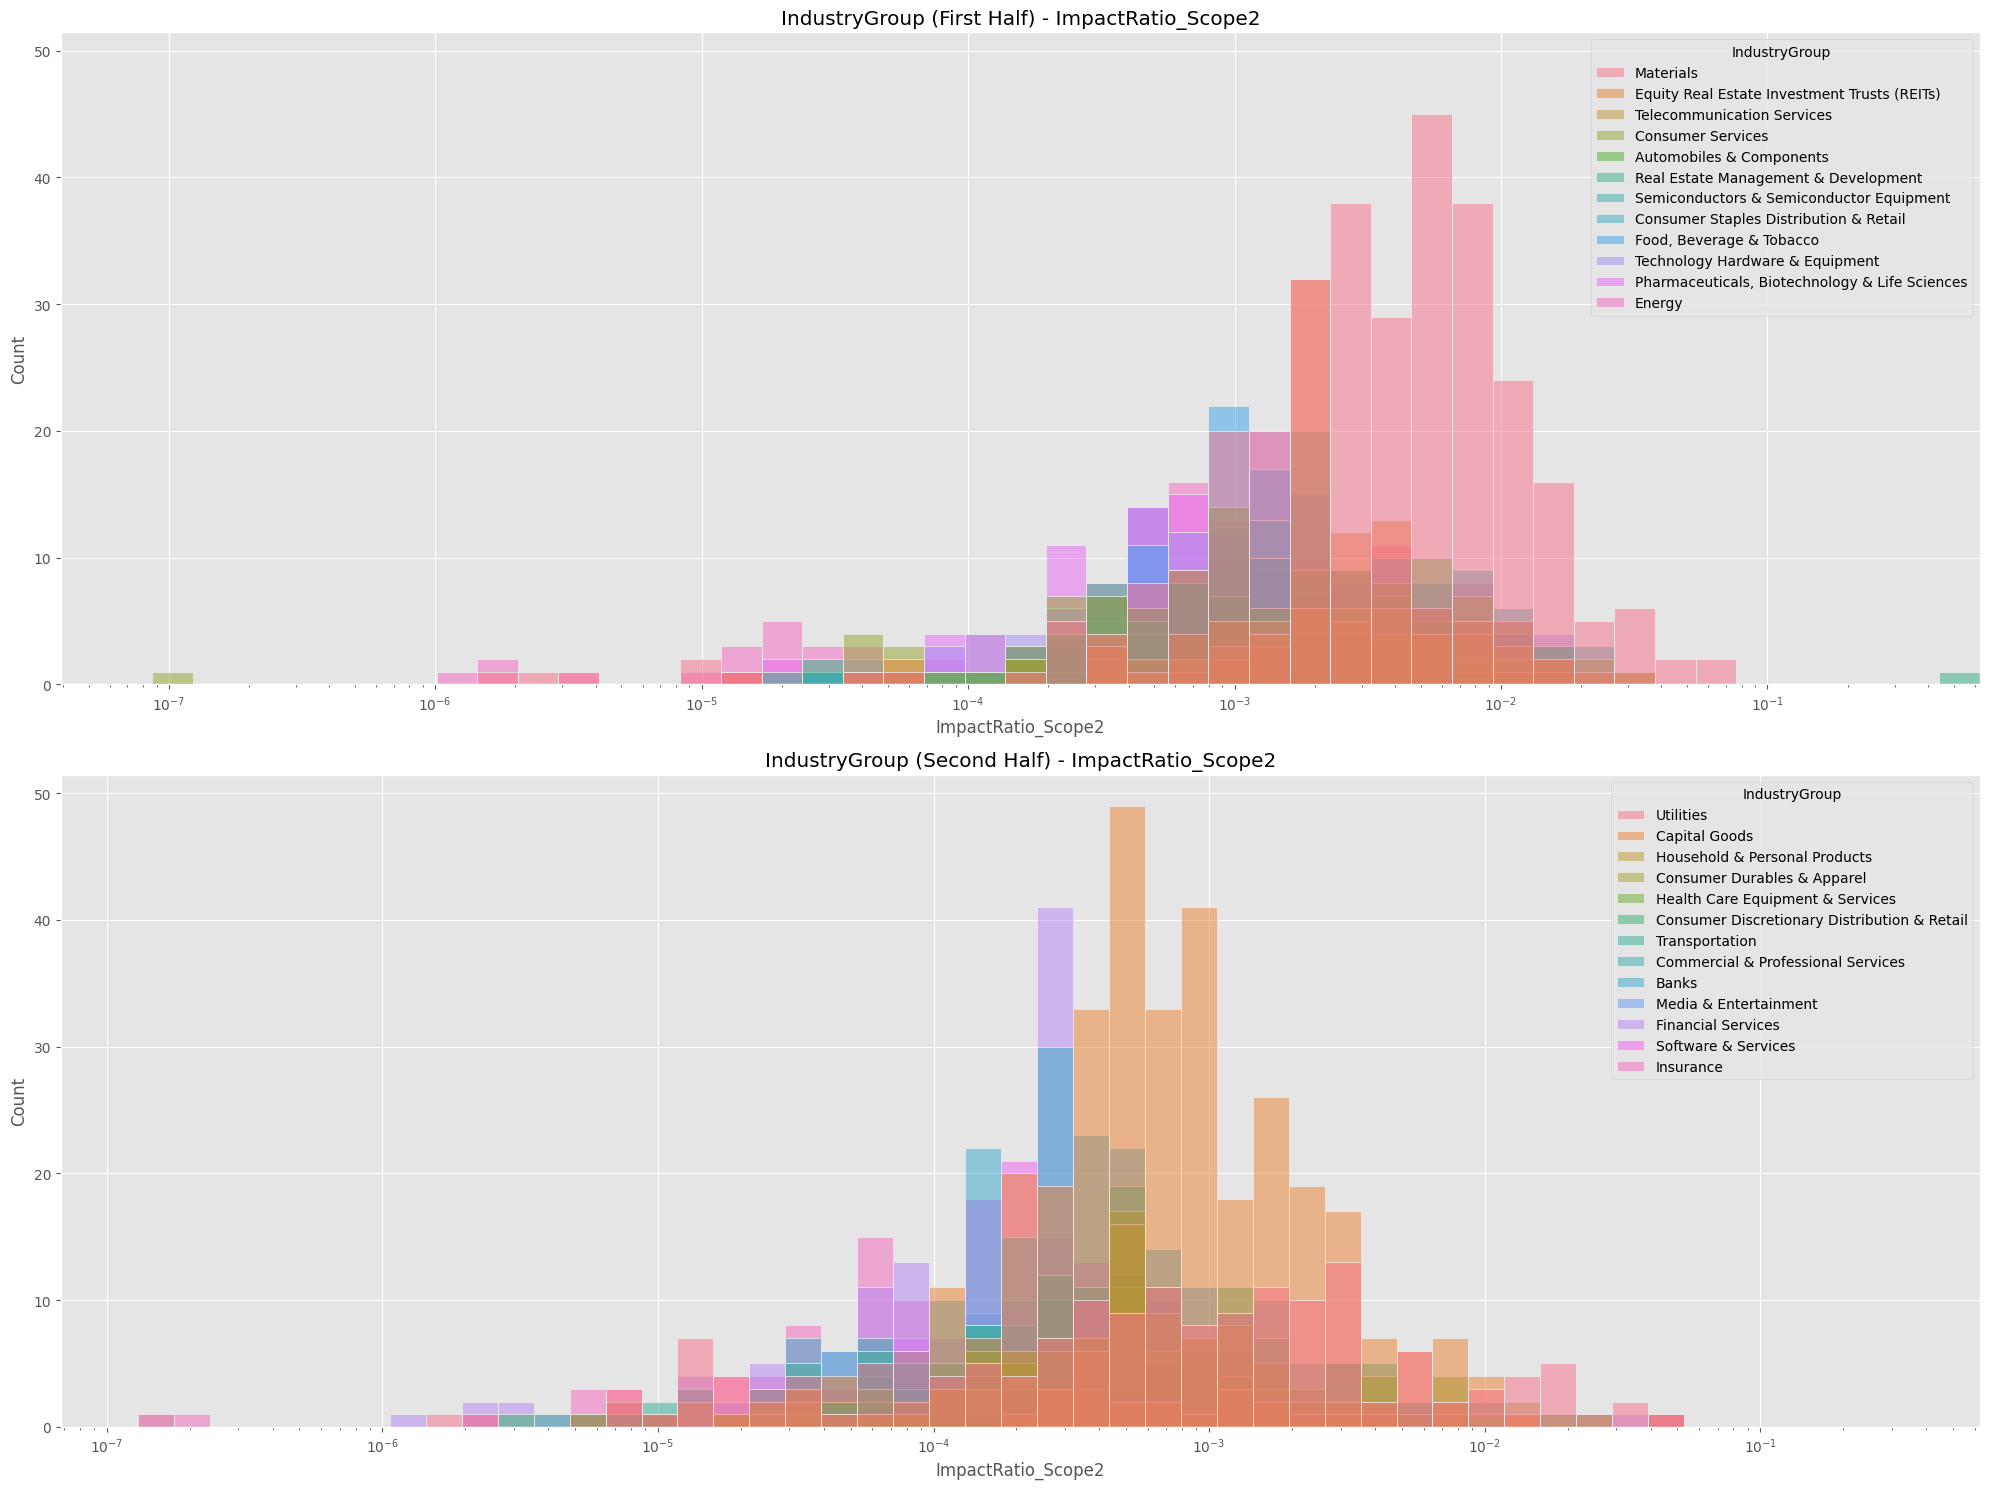

In [19]:
plot_industrygroup_hist_split(df, order_scope2, "ImpactRatio_Scope2")

<Axes: xlabel='Transformed_ImpactRatio_Scope1', ylabel='Transformed_ImpactRatio_Scope2'>

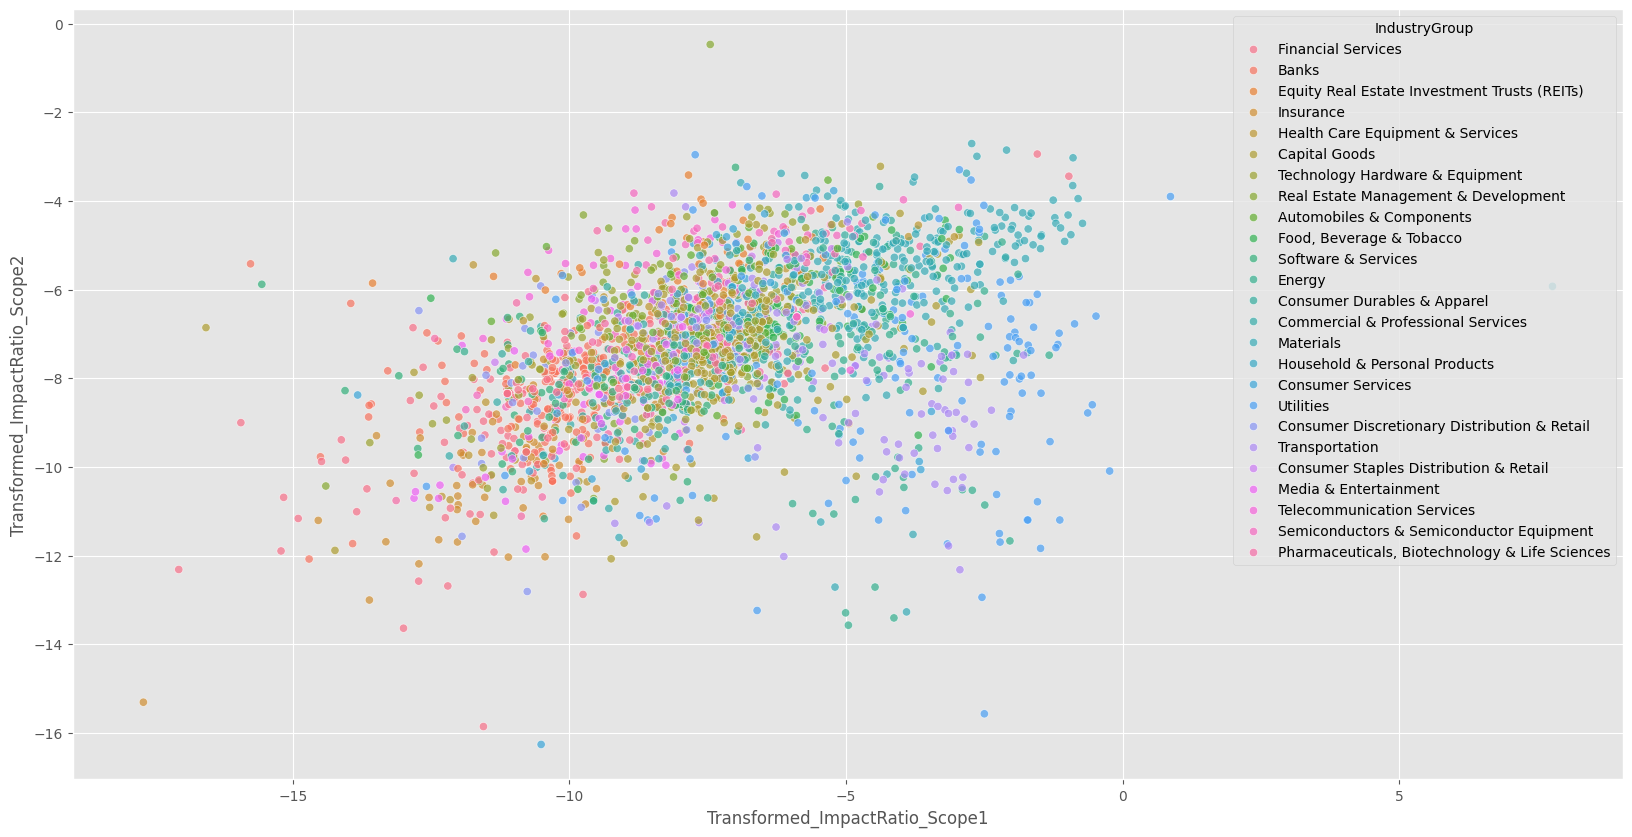

In [23]:
# Plot scatter plot of Impact Ratios
plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=df,
    x="Transformed_ImpactRatio_Scope1",
    y="Transformed_ImpactRatio_Scope2",
    hue="IndustryGroup",
    alpha=0.7,
)

**Analyzing Impact Ratios by industry**

In [36]:
# Compare rankings in Scope 1 and Scope 2
df_ranking = pd.DataFrame(
    index=order_scope1, columns=["Scope1_Rank", "Scope2_Rank"], data=np.nan
)

df_ranking["Scope1_Rank"] = df_group_industry["ImpactRatio_Scope1"].rank(ascending=True)
df_ranking["Scope2_Rank"] = df_group_industry["ImpactRatio_Scope2"].rank(ascending=True)

df_ranking

Scope1_Rank  Scope2_Rank
IndustryGroup                                                           
Utilities                                              25.0         13.0
Energy                                                 24.0         14.0
Materials                                              23.0         25.0
Transportation                                         22.0          7.0
Food, Beverage & Tobacco                               21.0         17.0
Consumer Services                                      20.0         22.0
Capital Goods                                          19.0         12.0
Household & Personal Products                          18.0         11.0
Pharmaceuticals, Biotechnology & Life Sciences         17.0         15.0
Automobiles & Components                               16.0         21.0
Semiconductors & Semiconductor Equipment               15.0         19.0
Equity Real Estate Investment Trusts (REITs)           14.0         24.0
Consumer Staples Distribution & Retail                 13.0         18.0
Real Estate Management & Development                   12.0         20.0
Health Care Equipment & Services                       11.0          9.0
Technology Hardware & Equipment                        10.0         16.0
Consumer Durables & Apparel                             9.0         10.0
Commercial & Professional Services                      8.0          6.0
Consumer Discretionary Distribution & Retail            7.0          8.0
Telecommunication Services                              6.0         23.0
Media & Entertainment                                   5.0          4.0
Software & Services                                     4.0          2.0
Banks                                                   3.0          5.0
Insurance                                               2.0          1.0
Financial Services                                      1.0          3.0

<Axes: ylabel='IndustryGroup'>

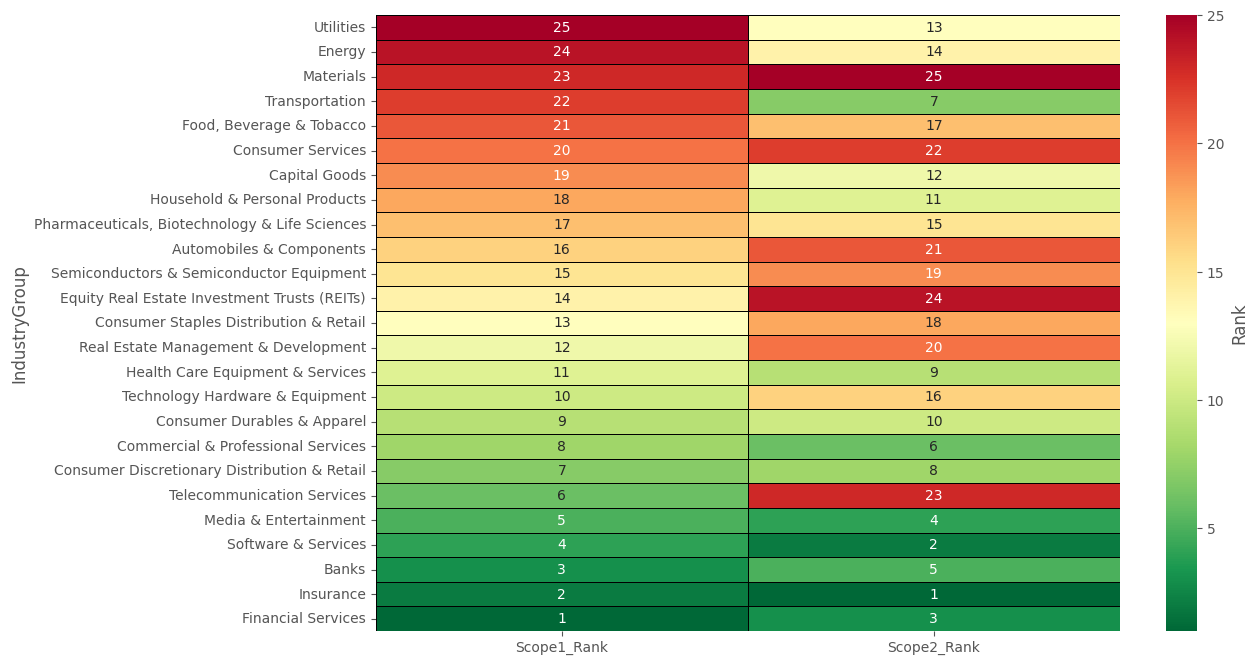

In [37]:
# Plot ranking coloring from green to red each cell
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_ranking,
    annot=True,
    cmap="RdYlGn_r",
    cbar_kws={"label": "Rank"},
    linewidths=0.5,
    linecolor="black",
    vmin=1,
    vmax=len(order_scope1),
)

<Axes: ylabel='IndustryGroup'>

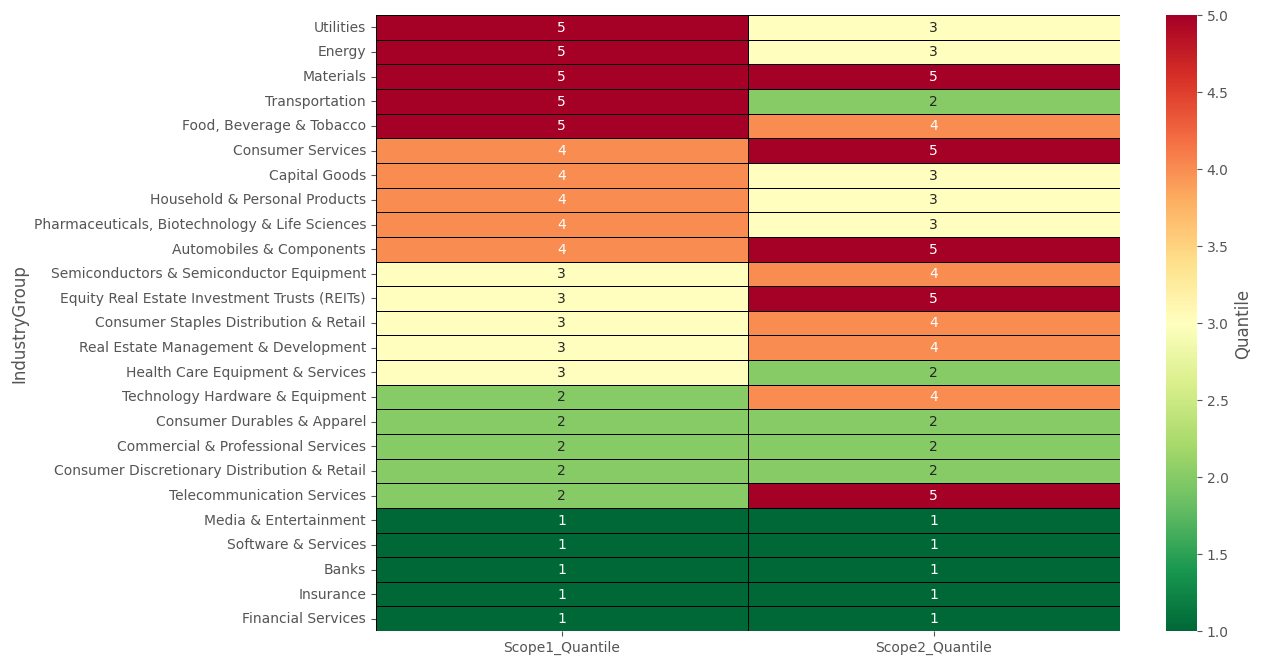

In [40]:
# Group ranking in quantiles and plot them again
df_ranking["Scope1_Quantile"] = (
    pd.qcut(df_ranking["Scope1_Rank"], q=5, labels=False) + 1
)
df_ranking["Scope2_Quantile"] = (
    pd.qcut(df_ranking["Scope2_Rank"], q=5, labels=False) + 1
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_ranking[["Scope1_Quantile", "Scope2_Quantile"]],
    annot=True,
    cmap="RdYlGn_r",
    cbar_kws={"label": "Quantile"},
    linewidths=0.5,
    linecolor="black",
    vmin=1,
    vmax=5,
)

# This plot is not fare because it does not take into account outliers

<Axes: ylabel='IndustryGroup'>

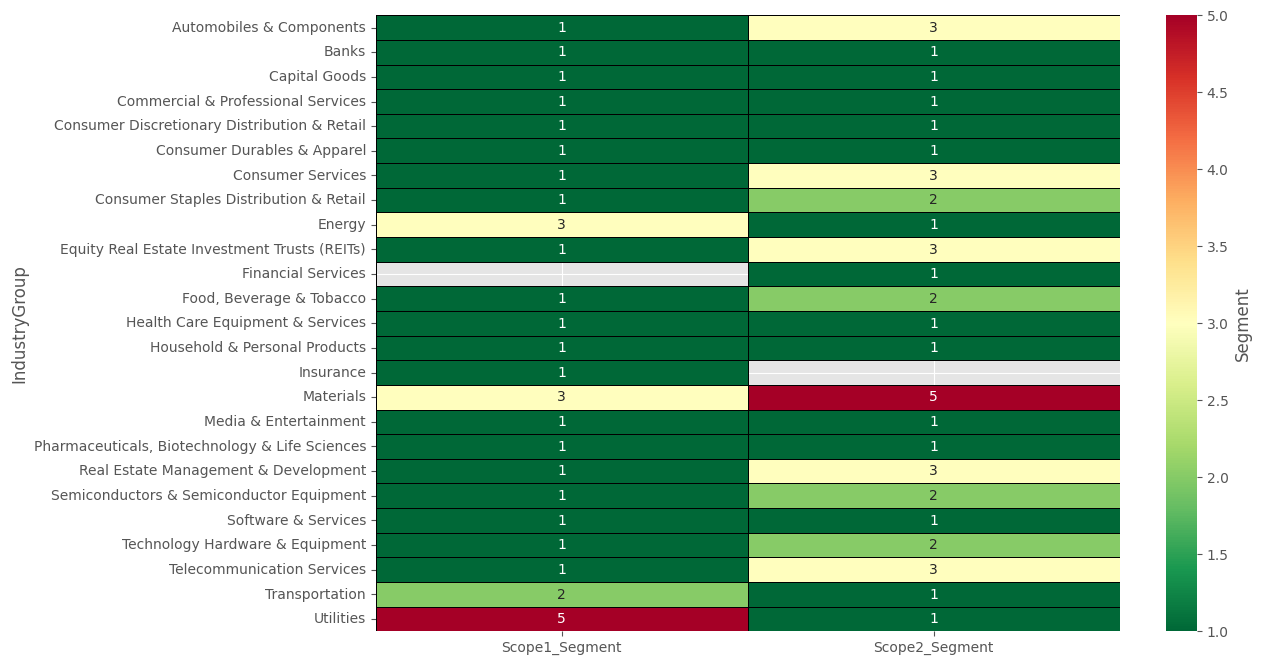

In [46]:
# min_scope1 = df_group_industry["ImpactRatio_Scope1"].min()
# min_scope2 = df_group_industry["ImpactRatio_Scope2"].min()
# max_scope1 = df_group_industry["ImpactRatio_Scope1"].max()
# max_scope2 = df_group_industry["ImpactRatio_Scope2"].max()

# # Split in 5 segments
# bins_scope1 = np.linspace(min_scope1, max_scope1, 6)
# bins_scope2 = np.linspace(min_scope2, max_scope2, 6)

# # Rank companies in each segment
# df_group_industry["Scope1_Segment"] = pd.cut(df_group_industry["ImpactRatio_Scope1"], bins=bins_scope1, labels=False) + 1
# df_group_industry["Scope2_Segment"] = pd.cut(df_group_industry["ImpactRatio_Scope2"], bins=bins_scope2, labels=False) + 1

# # Plot segments
# plt.figure(figsize=(12, 8))
# sns.heatmap(
#     df_group_industry[["Scope1_Segment", "Scope2_Segment"]],
#     annot=True,
#     cmap="RdYlGn_r",
#     cbar_kws={"label": "Segment"},
#     linewidths=0.5,
#     linecolor='black',
#     vmin=1, vmax=5
# )

Conclusions:
- Clearly Media&Entertainment, Software&Services, Banks, Insurance and Financial Services have the lowest Impact Ratios
- There are those with high direct emissions and low indirect emissions, such as Transportation, Utilities and Energy
- And those with high indirect emissions and low direct emissions, such as Telecommunication, Technology, REITs

- I guess that these information does not consider the investment of the companies, only the reported emissions.

https://finance.yahoo.com/quote/SAN.MC/sustainability/

https://www.santanderassetmanagement.com/content/view/7728/file/SAM_%20SUSTAINABLE%20WEALTH%20ACADEMY_ESG%20RATINGS.pdf

## Exercise 2:
	
> Leveraging the work done in the first exercise, your task now is to deepen the analysis on Impact Ratios, by defining a scoring logic for companies. Each company shall receive a score between 0 and 100 depending on their Scope 1 and Scope 2 Impact Ratios (separately). You’re free to assign the score using the method you consider more relevant, but beware of outliers. 

> Hint: Assign a 0-100 score is easier when the underlying data is normally distributed (or close to normal at least), because in this case simple rank or linear functions can work well. Look at the distribution of Impact Ratios overall, you might want to apply transformations (e.g. natural logarithm) before converting them to scores. 

In [ ]:
# Use something relative to the industry
# If high in the industry, penalize

# They say that scores are dependent on the industry
# Use something relative to the whole
# e.g. high in

In [64]:
# Can be different
df_scores = pd.DataFrame(index=df.index, dtype=float)
df_scores

Empty DataFrame
Columns: []
Index: [COM0001, COM0002, COM0003, COM0004, COM0005, COM0006, COM0007, COM0008, COM0009, COM0010, COM0012, COM0013, COM0014, COM0015, COM0019, COM0021, COM0022, COM0023, COM0024, COM0025, COM0026, COM0027, COM0028, COM0029, COM0030, COM0031, COM0032, COM0033, COM0034, COM0035, COM0036, COM0037, COM0038, COM0039, COM0042, COM0043, COM0044, COM0045, COM0046, COM0047, COM0048, COM0049, COM0050, COM0051, COM0052, COM0053, COM0054, COM0056, COM0058, COM0059, COM0060, COM0061, COM0062, COM0063, COM0064, COM0066, COM0068, COM0069, COM0071, COM0072, COM0073, COM0074, COM0075, COM0078, COM0079, COM0080, COM0081, COM0082, COM0084, COM0086, COM0087, COM0088, COM0089, COM0090, COM0091, COM0092, COM0093, COM0095, COM0096, COM0098, COM0099, COM0101, COM0102, COM0105, COM0106, COM0107, COM0108, COM0109, COM0110, COM0112, COM0113, COM0114, COM0117, COM0118, COM0119, COM0120, COM0122, COM0123, COM0124, COM0125, ...]

[2897 rows x 0 columns]

Approach 1: Percentile in the industry

In [100]:
# TODO: Greater is better
def score_percentile_industry(df, column, industry_column="IndustryGroup"):
    """Score based on percentile in the industry."""
    # TODO: This is just a simple min-max normalization
    df_group = df.groupby(industry_column)[column].transform(
        lambda x: 1 - (x - x.min()) / (x.max() - x.min())
    )
    return df_group


# Look min-max of impact ratios per industry
# Unless for certain that the worst is defined, we may want to extrapolate

df_scores["Score1_percentile"] = score_percentile_industry(df, "Log_ImpactRatio_Scope1")
df_scores["Score2_percentile"] = score_percentile_industry(df, "Log_ImpactRatio_Scope2")

df_scores

Score1_percentile  Score2_percentile  Score1_global  Score2_global
CompanyID                                                                    
COM0001             0.609794           0.411564       0.728410       0.493148
COM0002             0.559048           0.451230       0.700831       0.496133
COM0003             0.573716           0.390602       0.708252       0.469733
COM0004             0.476523           0.457569       0.659075       0.498894
COM0005             0.522511           0.391424       0.682344       0.470090
...                      ...                ...            ...            ...
COM3430             0.765818           0.712964       0.757261       0.618302
COM3431             0.626210           0.325535       0.488570       0.359377
COM3432             0.628243           0.397677       0.490157       0.407642
COM3436             0.366512           0.483445       0.607394       0.445164
COM3437                  NaN           0.915361            NaN       0.704846

[2897 rows x 4 columns]

<Axes: xlabel='Score1_percentile', ylabel='Log_ImpactRatio_Scope1'>

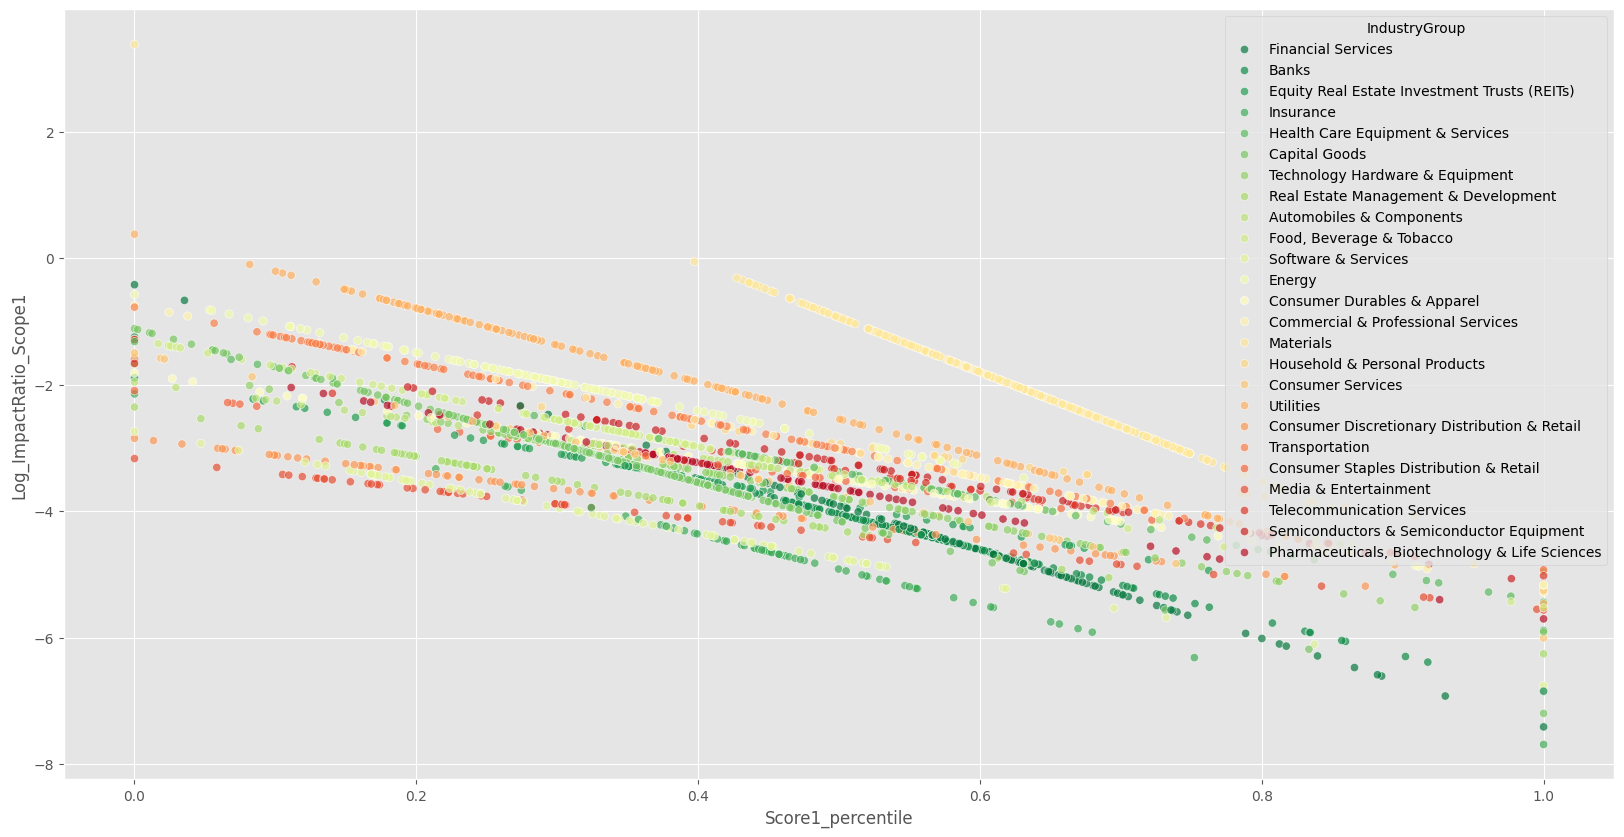

In [111]:
# Plot scatter plot of scores
plt.figure(figsize=(20, 10))
sns.scatterplot(
    x=df_scores["Score1_percentile"],
    y=df["Log_ImpactRatio_Scope1"],
    hue=df["IndustryGroup"],
    alpha=0.7,
    palette=order_colors,
)

# As expected, a diagonal line

In [121]:
df["Score1_percentile"] = df_scores["Score1_percentile"]

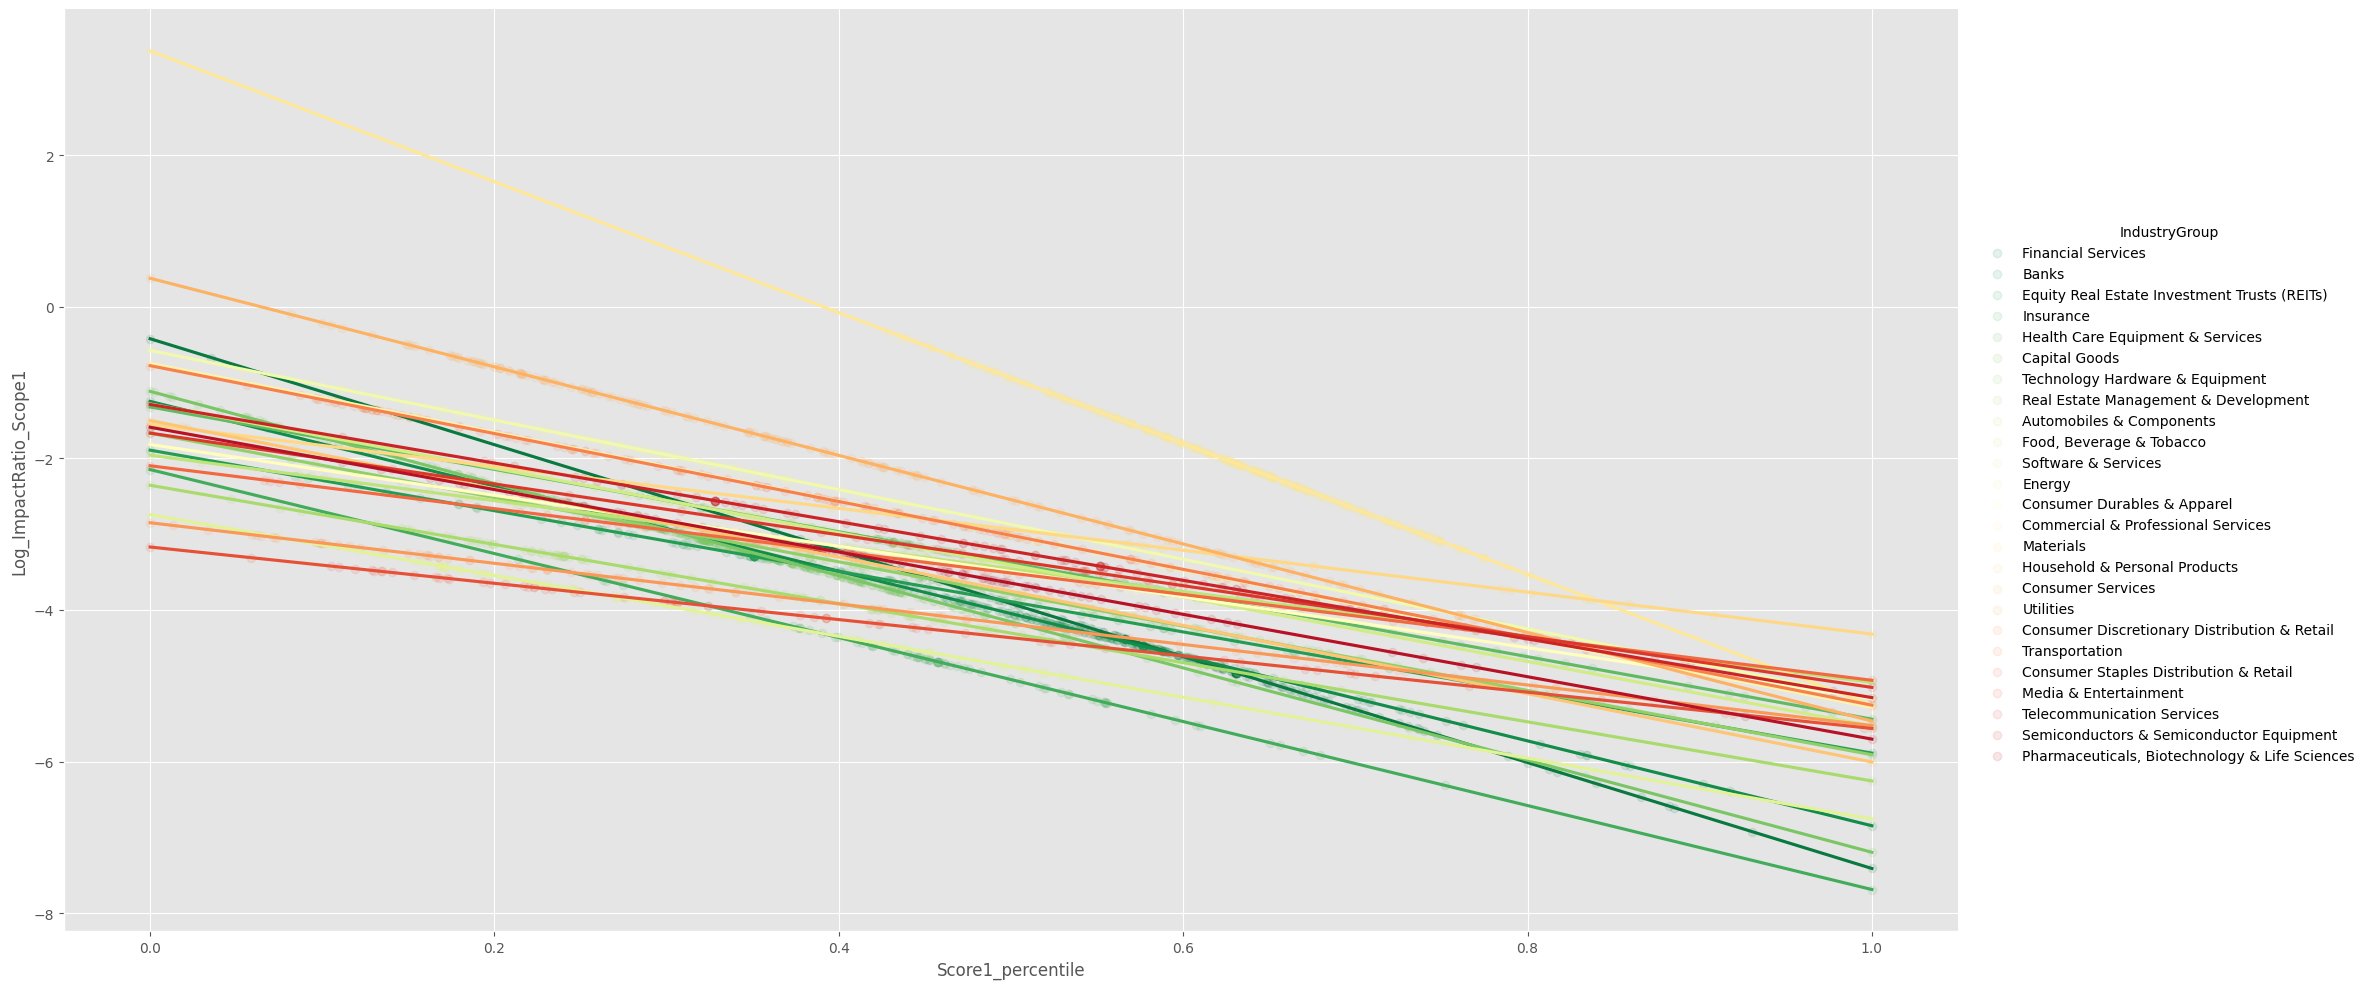

In [137]:
# Set figure size for lmplot
sns.lmplot(
    data=df,
    y="Log_ImpactRatio_Scope1",
    x="Score1_percentile",
    hue="IndustryGroup",
    scatter_kws={"alpha": 0.1},
    palette=order_colors,
    height=10,
    aspect=2,
)
plt.show()

Approach 2: Percentile in the whole dataset

In [98]:
def score_percentile_global(df, column):
    """Score based on percentile in the whole dataset."""
    return 1 - (df[column] - df[column].min()) / (df[column].max() - df[column].min())


df_scores["Score1_global"] = score_percentile_global(df, "Log_ImpactRatio_Scope1")
df_scores["Score2_global"] = score_percentile_global(df, "Log_ImpactRatio_Scope2")

df_scores

Score1_percentile  Score2_percentile  Score1_global  Score2_global
CompanyID                                                                    
COM0001             0.390206           0.588436       0.728410       0.493148
COM0002             0.440952           0.548770       0.700831       0.496133
COM0003             0.426284           0.609398       0.708252       0.469733
COM0004             0.523477           0.542431       0.659075       0.498894
COM0005             0.477489           0.608576       0.682344       0.470090
...                      ...                ...            ...            ...
COM3430             0.234182           0.287036       0.757261       0.618302
COM3431             0.373790           0.674465       0.488570       0.359377
COM3432             0.371757           0.602323       0.490157       0.407642
COM3436             0.633488           0.516555       0.607394       0.445164
COM3437                  NaN           0.084639            NaN       0.704846

[2897 rows x 4 columns]

<Axes: xlabel='Score1_global', ylabel='Log_ImpactRatio_Scope1'>

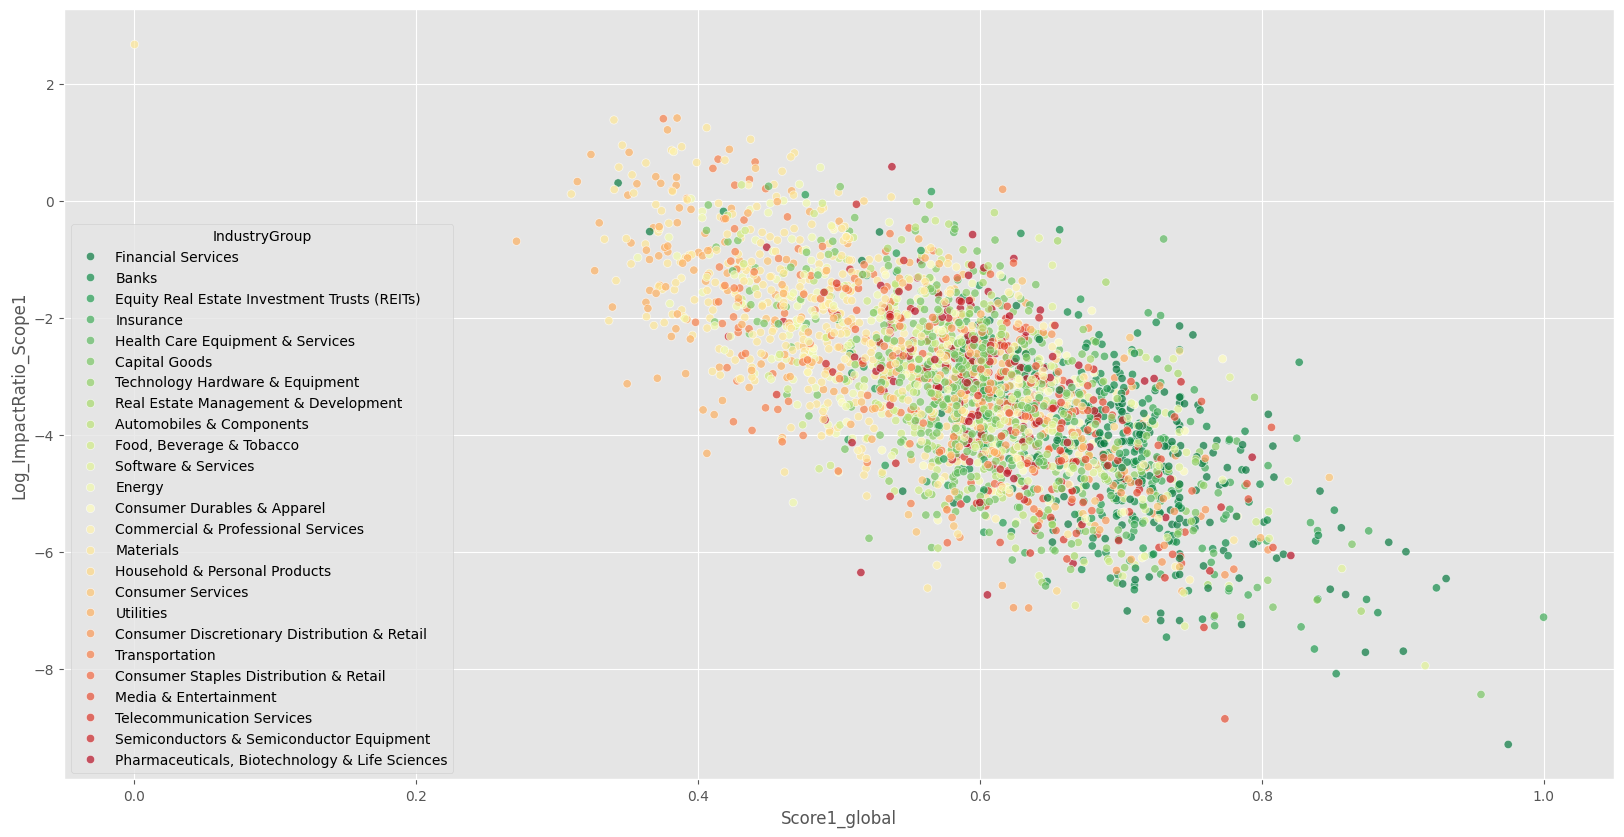

In [99]:
# Plot scatter plot of scores with jitter to avoid point collapse
plt.figure(figsize=(20, 10))
jitter_strength_y = 0.1 * (
    df["Log_ImpactRatio_Scope1"].max() - df["Log_ImpactRatio_Scope1"].min()
)
y_jitter = df["Log_ImpactRatio_Scope1"] + np.random.normal(
    0, jitter_strength_y, size=len(df)
)
sns.scatterplot(
    y=y_jitter,
    x=df_scores["Score1_global"],
    hue=df["IndustryGroup"],
    alpha=0.7,
    palette=order_colors,
)

Approach 3: Combination of both

In [103]:
combination_weight = 0.7
df_scores["Score1_combined"] = df_scores[
    "Score1_percentile"
] * combination_weight + df_scores["Score1_global"] * (1 - combination_weight)
df_scores["Score2_combined"] = df_scores[
    "Score2_percentile"
] * combination_weight + df_scores["Score2_global"] * (1 - combination_weight)

df_scores

Score1_percentile  Score2_percentile  Score1_global  Score2_global  \
CompanyID                                                                       
COM0001             0.609794           0.411564       0.728410       0.493148   
COM0002             0.559048           0.451230       0.700831       0.496133   
COM0003             0.573716           0.390602       0.708252       0.469733   
COM0004             0.476523           0.457569       0.659075       0.498894   
COM0005             0.522511           0.391424       0.682344       0.470090   
...                      ...                ...            ...            ...   
COM3430             0.765818           0.712964       0.757261       0.618302   
COM3431             0.626210           0.325535       0.488570       0.359377   
COM3432             0.628243           0.397677       0.490157       0.407642   
COM3436             0.366512           0.483445       0.607394       0.445164   
COM3437                  NaN           0.915361            NaN       0.704846   

           Score1_combined  Score2_combined  
CompanyID                                    
COM0001           0.645379         0.436039  
COM0002           0.601583         0.464701  
COM0003           0.614077         0.414341  
COM0004           0.531289         0.469966  
COM0005           0.570461         0.415024  
...                    ...              ...  
COM3430           0.763251         0.684565  
COM3431           0.584918         0.335687  
COM3432           0.586817         0.400667  
COM3436           0.438777         0.471961  
COM3437                NaN         0.852206  

[2897 rows x 6 columns]

<Axes: xlabel='Score1_combined', ylabel='Log_ImpactRatio_Scope1'>

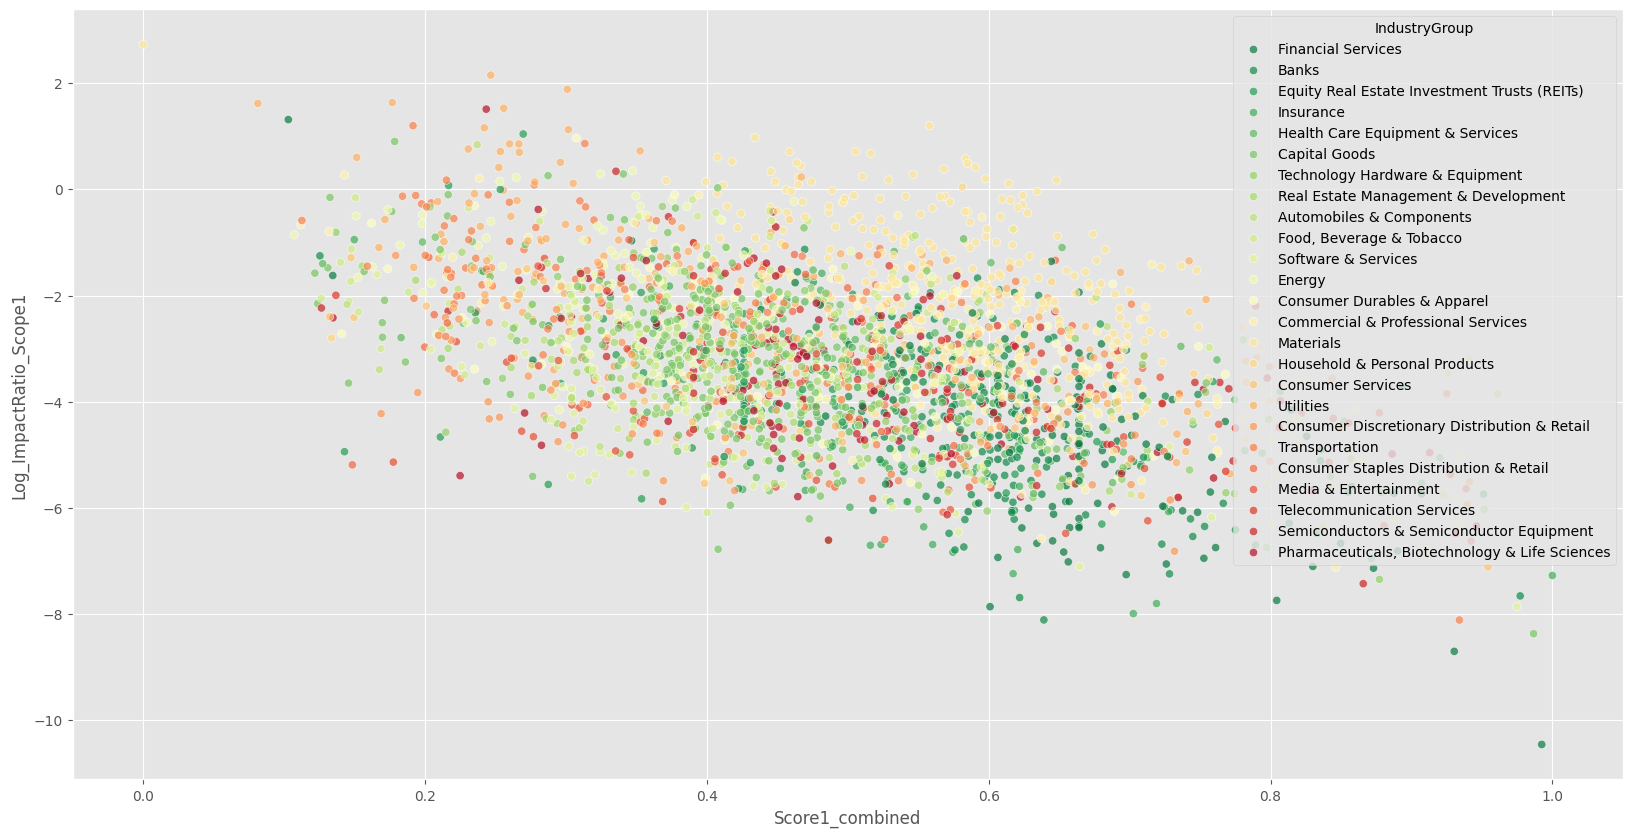

In [104]:
# Plot scatter plot of scores with jitter to avoid point collapse
plt.figure(figsize=(20, 10))
jitter_strength_y = 0.1 * (
    df["Log_ImpactRatio_Scope1"].max() - df["Log_ImpactRatio_Scope1"].min()
)
y_jitter = df["Log_ImpactRatio_Scope1"] + np.random.normal(
    0, jitter_strength_y, size=len(df)
)
sns.scatterplot(
    y=y_jitter,
    x=df_scores["Score1_combined"],
    hue=df["IndustryGroup"],
    alpha=0.7,
    palette=order_colors,
)

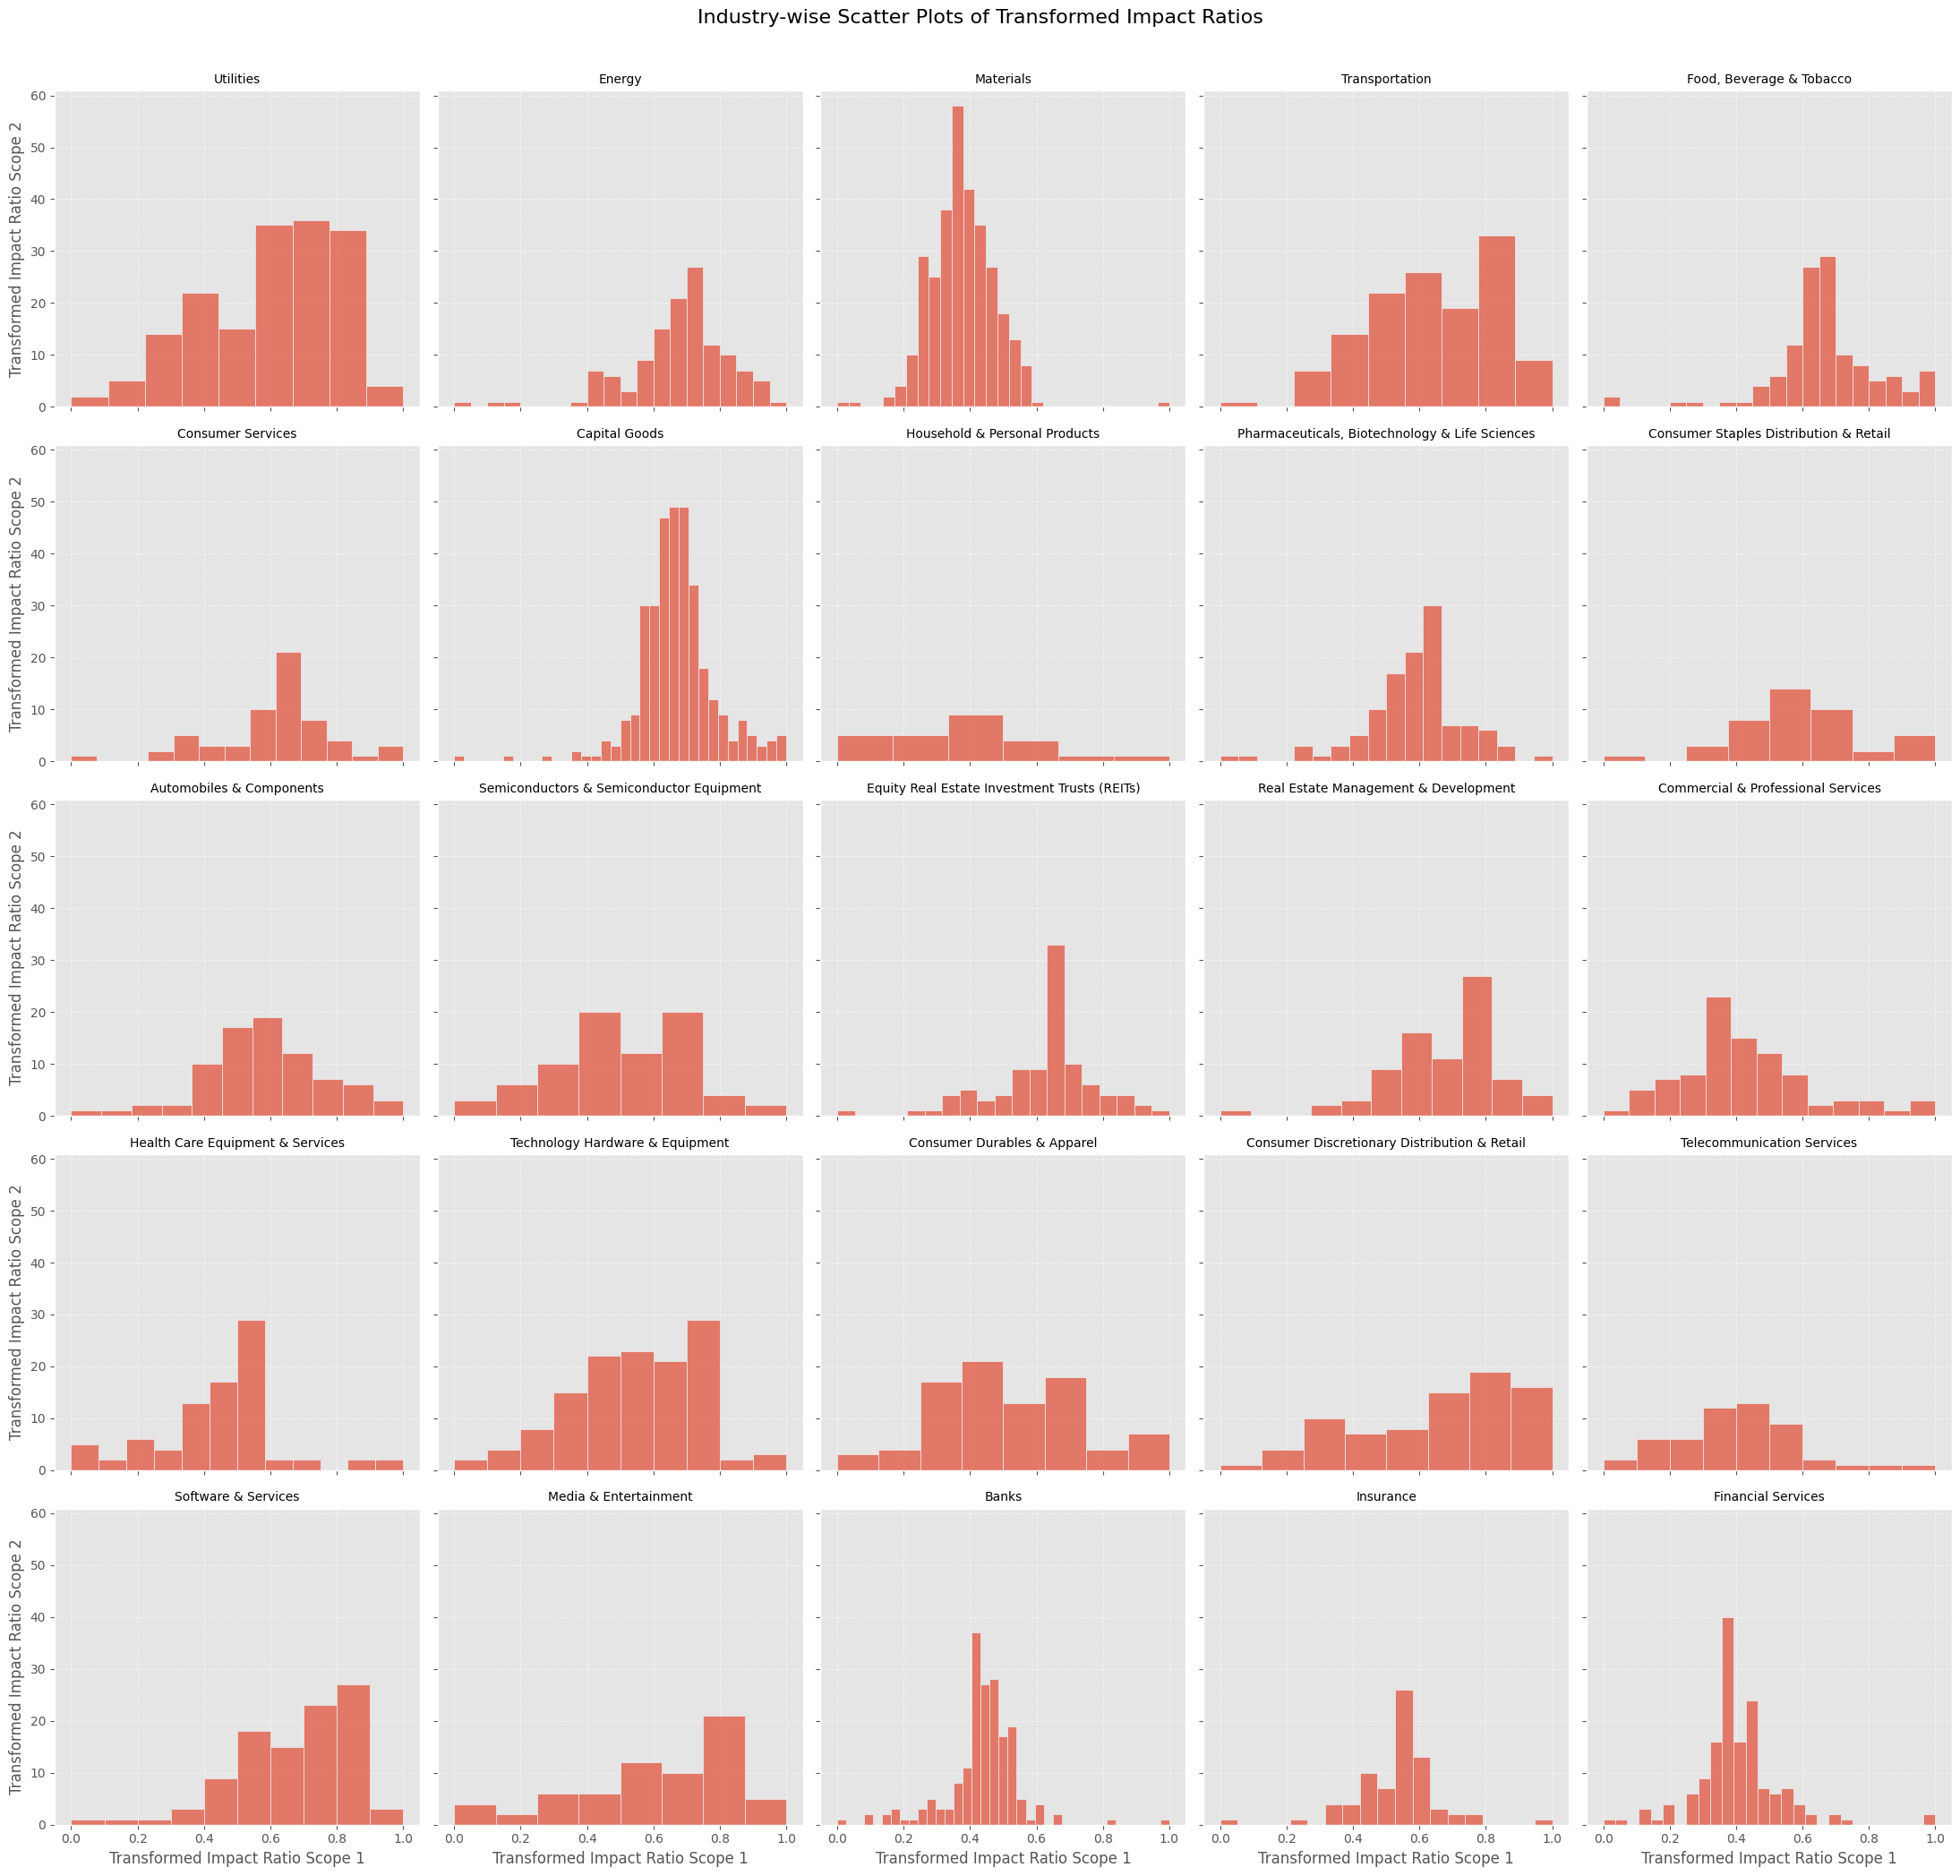

In [90]:
# Improved 5x5 grid of scatter plots for each industry
n_rows = 5
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 22), sharex=True, sharey=True)
for i, industry in enumerate(order_scope1):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.histplot(
        data=df[df["IndustryGroup"] == industry],
        x="Transformed_ImpactRatio_Scope1",
        # data=df_scores[df["IndustryGroup"] == industry],
        # x="Score1_percentile",
        ax=ax,
        # hue="IndustryGroup",
        # palette=[order_colors[-i]],
        alpha=0.7,
        legend=False,
    )
    # sns.scatterplot(
    #     data=df[df["IndustryGroup"] == industry],
    #     x="Transformed_ImpactRatio_Scope1",
    #     y="Transformed_ImpactRatio_Scope2",
    #     ax=ax,
    #     hue="IndustryGroup",
    #     palette=[order_colors[-i]],
    #     alpha=0.7,
    #     s=40,  # marker size
    #     legend=False,
    # )
    ax.set_title(industry, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)
    if row == n_rows - 1:
        ax.set_xlabel("Transformed Impact Ratio Scope 1")
    else:
        ax.set_xlabel("")
    if col == 0:
        ax.set_ylabel("Transformed Impact Ratio Scope 2")
    else:
        ax.set_ylabel("")

plt.suptitle("Industry-wise Scatter Plots of Transformed Impact Ratios", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## References

ESG Scores and Raw Data
https://www.spglobal.com/sustainable1/en/solutions/esg-scores-data

S&P Global ESG Scores Methodology
https://portal.s1.spglobal.com/survey/documents/spglobal_esg_scores_methodology.pdf

CSA Methodology
https://www.spglobal.com/sustainable1/en/csa/methodology

The S&P Global ESG Score cannot be compared across industries

The S&P Global ESG Score uses a double materiality approach whereby a sustainability issue is considered to be material if it presents a significant impact on society or the environment and a significant impact on a company's value drivers, competitive position, and long-term shareholder value creation.